In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_columns', 111)


In [3]:
data = pd.read_excel('dataset.xlsx')

In [4]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# Exploration et analyse des données

## objectif

* Comprendre du mieux possible nos données
* devellopé une premiere stratégie de modélisation

## Checklist de base

### Analyse de forme :

* **variable target :** SARS-Cov-2 exam result
* **lignes et colonnes :** (5644	111)
* **types de variable :** quantitative 70, qualitatives 41
* **analyses des valeurs manquantes :** 
    * beaucoup de NAN(moitié des variable > 90 % de NAN), 
    * 2 groupes de données 76% -> test virale, 89% -> taux sanguin

### Analyse de fond :

* **visualisation de la target :** 
  * 10 de cas positive (558/50000)
* **signification de la target :**
  * variables continues standardisées, assymétrique, test sanguin
  * **age quantile :** difficile d'interprété ce graphique, les donées en sans doute été traité, On pourait penser 0-5 mais cela pourait aussi être une transformation mathématique. On ne peut pas savoir a car la perssones qui a mis ce dataset ne le précise nul part, Mais ce n'est pas inportant   
  * variable qualitative : binaire (0,1), ce sont des variable virale et il y a le Rhinovirus qui semble très élevé
  * 
* **Relation Variables/Target :**
  * target / blood : les tests de monocytes, platelets, leukocytes, semble lié au coivid 19 -> hypothèse à vérifier
  * target / age : les individus de faible age sont très peu contaminés ? -> attention on ne connait pas l'age, et on  ne sais pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touché autant que les adultes.). En revanche cette variable pourra être intéressante pour la comparer avec les résultats de tests sanguins 
  * target / viral : les doubles maladies sont très rares. Rhinovirus/Enterovirus positif il y en a beaucoup dans cette hopitale mais est ce qu ça un lien avec le covid- 19 négatif ? -> hyposthèse a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus peu très bien avoir 2 virus en meme temps. Tout ça n'a aucun lien avec le covid-19

## Conclusion Initial

* Beaucoup de données manquantes (au mieux on garde 20 % du dataset)
* 2 groupes de donées intéréssantes (viral, sanguin)
* Presque pas de variable "discriminante" pour distinguer les cas positif/négatifs, ce qui nous permet de dire qu'il n'est pas vraiment approprié de vouloire prédire si un individu est atteint du Covid-19 en se basant sur ces simples  tests sanguins. lais ce n'est pas grave, il faut quand même poursuivre l'analyse pour éssayer de voir ce qu'on peut apprendre.
* On peut identifier des variables intéréssantes qui sont suceptible de jouer un role non négligeable (monocytes etc)

## Analayses plus détaillié

*  **Relation variable/variable**
   * Blood_data / Blood_data : certaines variables sont très corrélé + 0.9 (a surveillier plus tard)
   * blood_data / age : on observe une très faible corrélation entre age et taux sanguins
   * viral / viral : influenza rapid test donne de mauvais résultats, il faudrait peut être les laisser
   * relation malade / blood data : On peut observé que les taux sanguins entre malade et covid-19 sont différents
   * relation hospitalisation / est_Malade :
   * relation hospitalisation / Blood : interresant dans le cas ou on voudrait prédire dans quelle service le patient devraient aller 
     
* **Nan Analyse** viral : 1350(92/8), blood 600(87/13), both : 90

## Hypothèse nulle (H0):

* Les individus atteints du covid-19 ont des taux de Leukocytrs,Monocytes, Platelets significativement différents
  * H0 = les taux moyens sont Egaux chez les individus positif et négatifs (hypothèse rejeté)
* les individus atteints d'une quelquonque maladie ont des taux significativement différent

## Analyse de Forme :

In [5]:
df = data.copy()

In [6]:
df.shape

(5644, 111)

In [7]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [8]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: ylabel='count'>

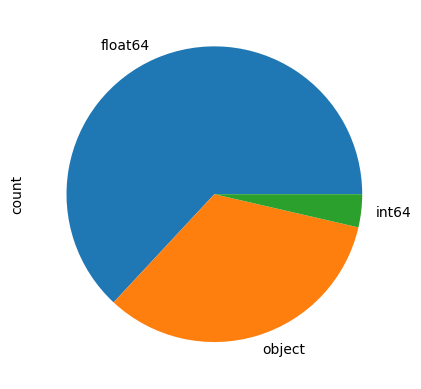

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

<Axes: >

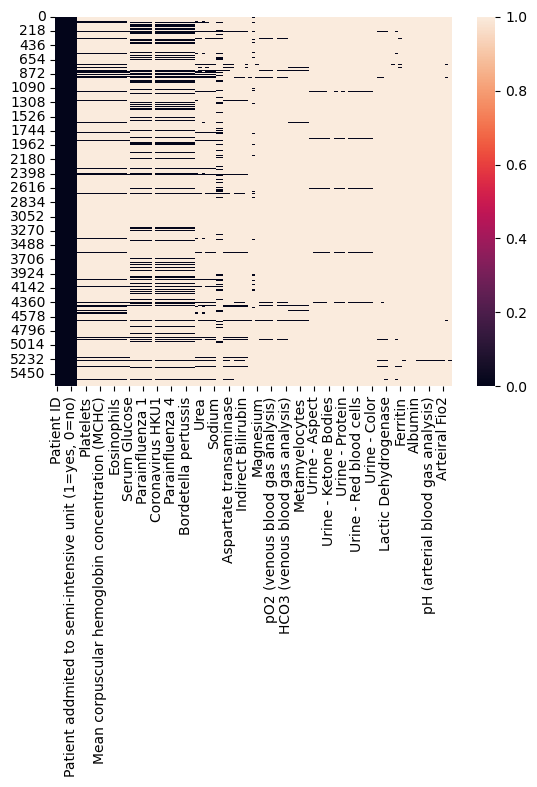

In [11]:
sns.heatmap(df.isna())

<Axes: >

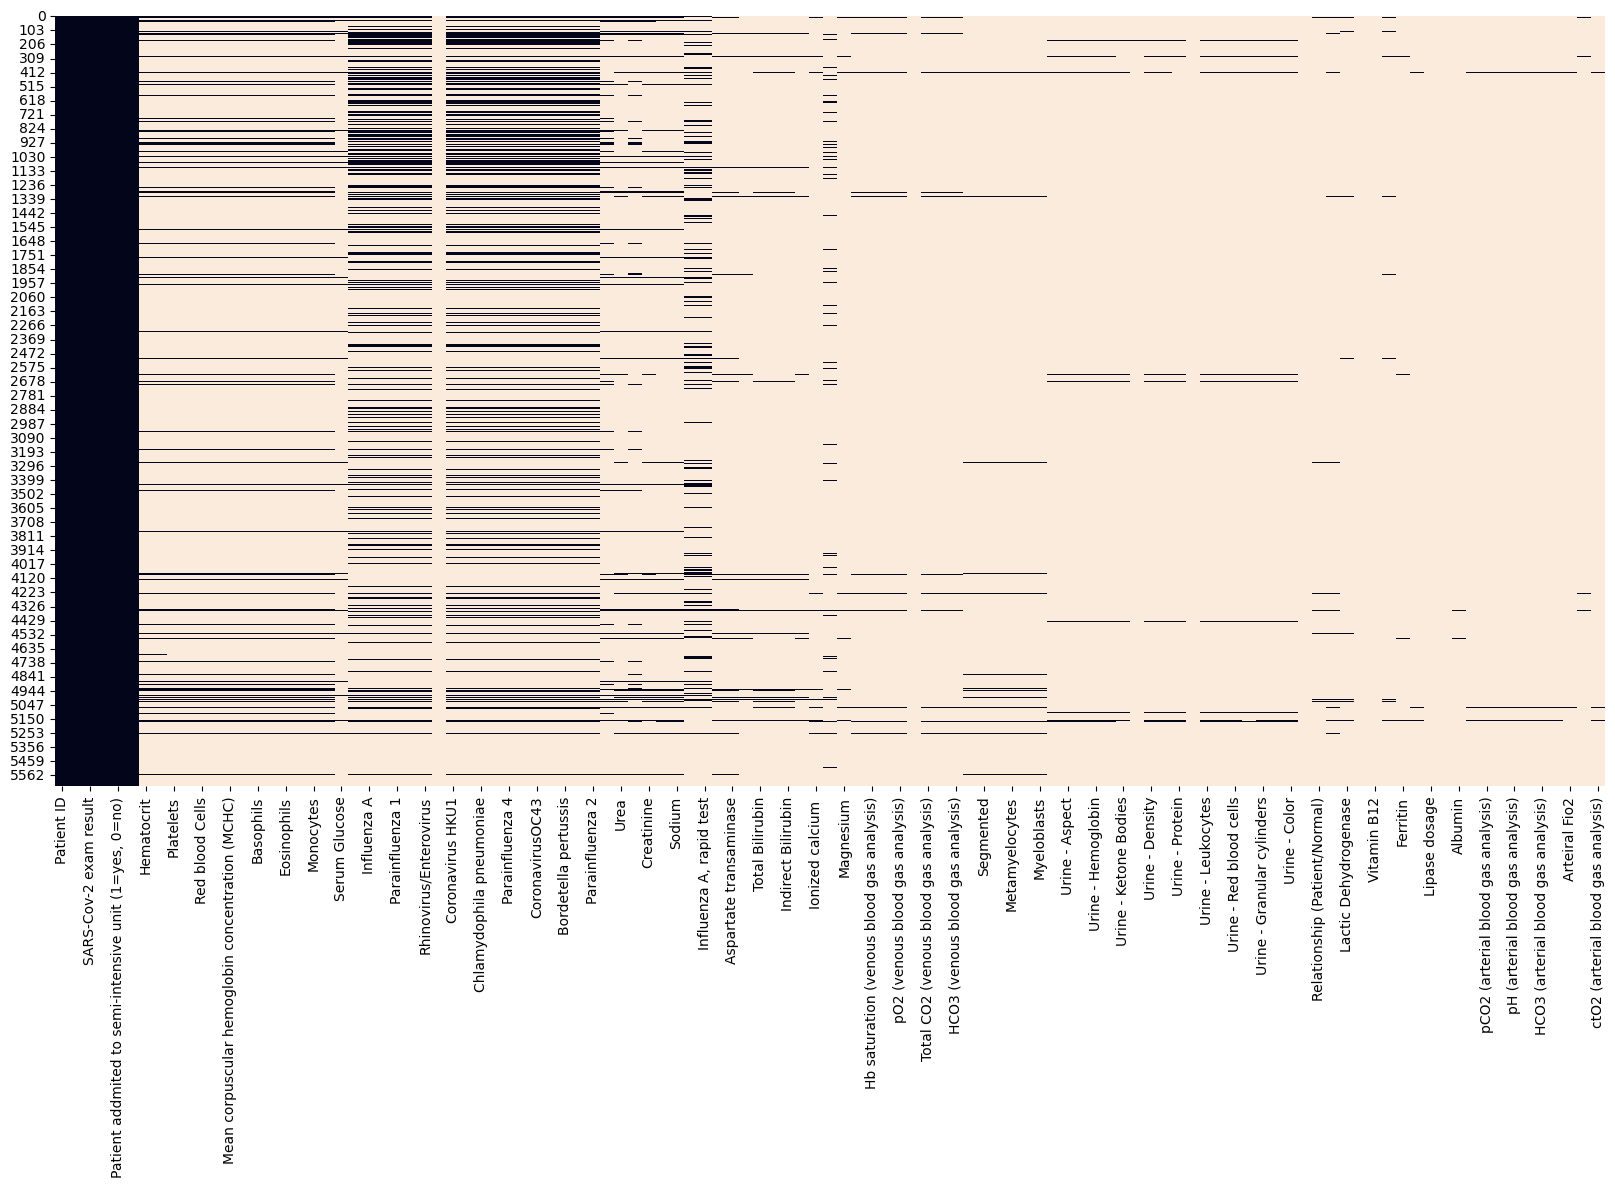

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [13]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [14]:
df.isna().sum()/df.shape[0]

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [15]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Mycoplasma pneumoniae                                    1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Urine - Sugar                                            1.000000
Partial thromboplastin time (PTT)                        1.000000
Urine - Nitrite                                          0.999823
Fio2 (venous blood gas analysis)                         0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral Fio2                                            0.996456
Ferritin                                                 0.995925
Arterial Lactic Acid                                     0.995216
Hb saturation (arterial blood gases)                     0.995216
pH (arteri

In [16]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Influenza A                                              0.760099
Respiratory Syncytial Virus                              0.760099
Parainfluenza 1                                          0.760454
Rhinovirus/Enterovirus                                   0.760454
Coronavirus HKU1                                         0.760454
Chlamydophila pneumoniae                                 0.760454
CoronavirusNL63                                          0.760454
Parainfluenza 3                                          0.760454
Adenovirus

## Analyse de Fond

### 1) visualisation et élimination des colones inutiles

In [17]:
(df.isna().sum()/df.shape[0]) < 0.9

Patient ID                                                True
Patient age quantile                                      True
SARS-Cov-2 exam result                                    True
Patient addmited to regular ward (1=yes, 0=no)            True
Patient addmited to semi-intensive unit (1=yes, 0=no)     True
Patient addmited to intensive care unit (1=yes, 0=no)     True
Hematocrit                                                True
Hemoglobin                                                True
Platelets                                                 True
Mean platelet volume                                      True
Red blood Cells                                           True
Lymphocytes                                               True
Mean corpuscular hemoglobin concentration (MCHC)          True
Leukocytes                                                True
Basophils                                                 True
Mean corpuscular hemoglobin (MCH)                      

In [18]:
df.columns[(df.isna().sum()/df.shape[0]) < 0.9]

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'In

In [19]:
df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

In [20]:
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

In [21]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

<Axes: >

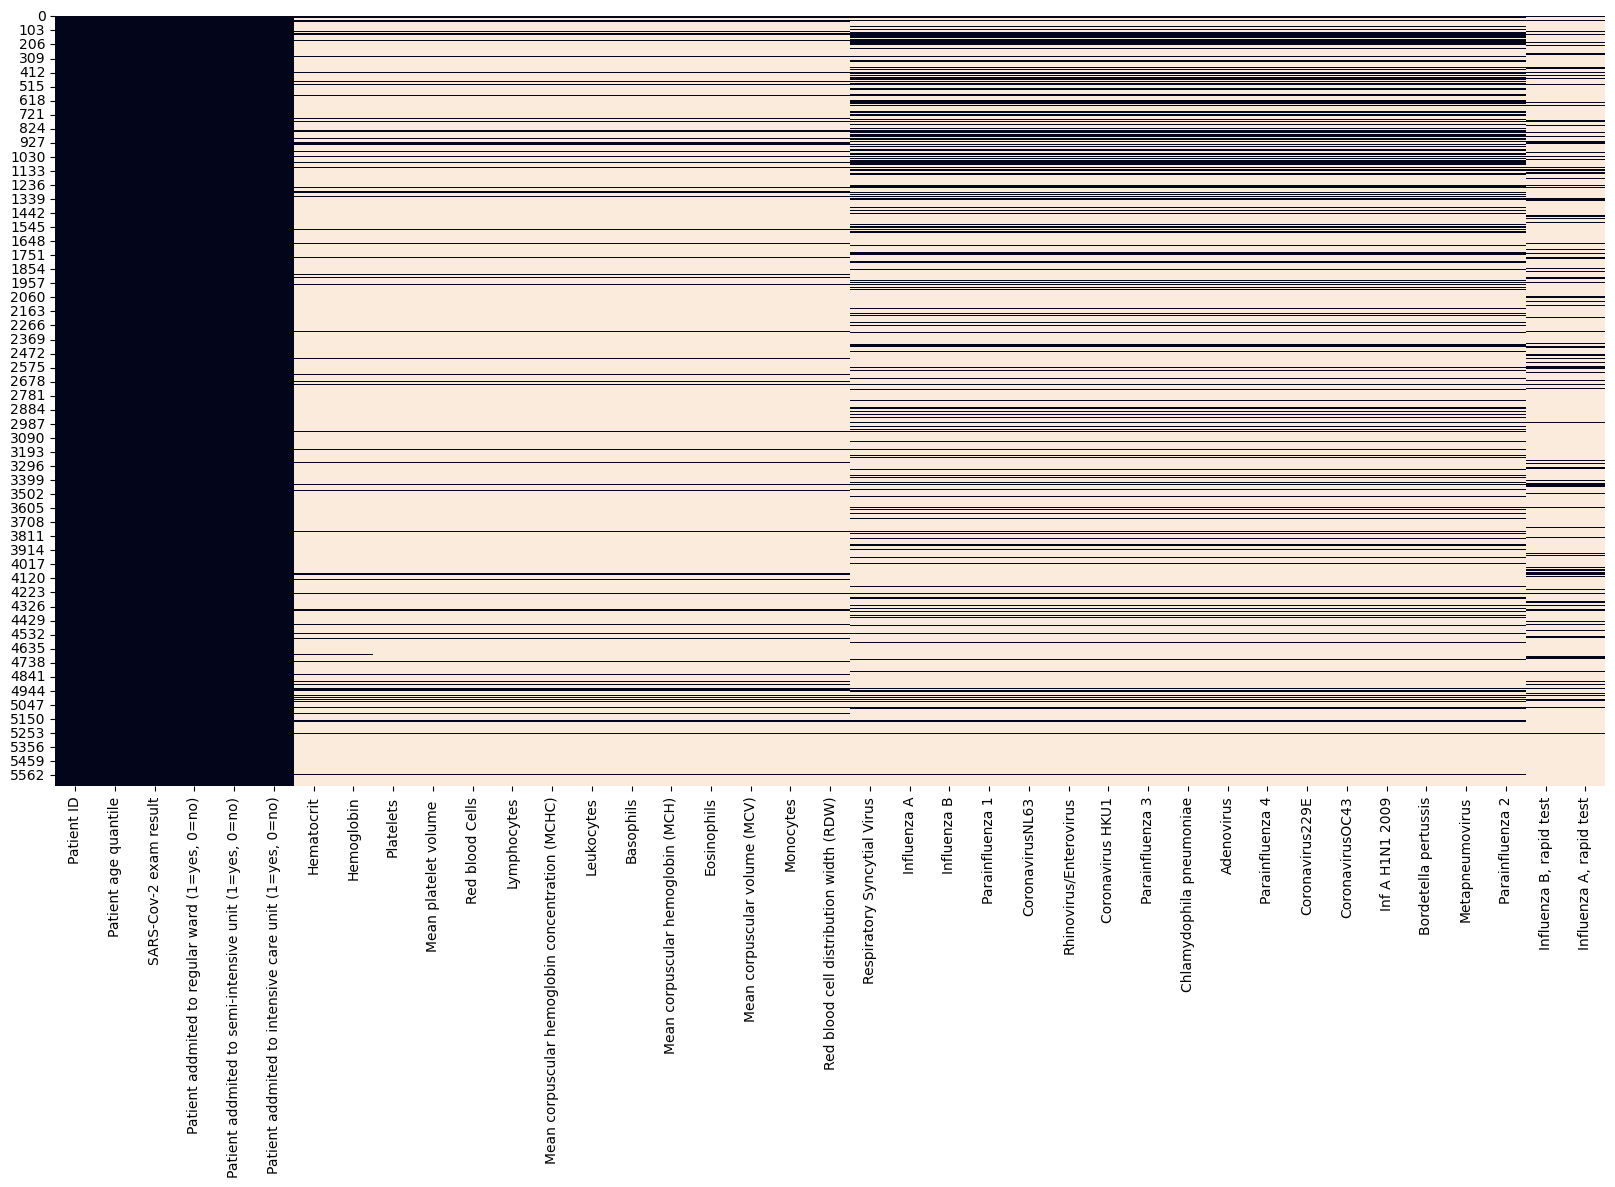

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [23]:
df.drop(columns=['Patient ID'],axis=1, inplace=True)

In [24]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [25]:
df["SARS-Cov-2 exam result"]

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object

In [26]:
df["SARS-Cov-2 exam result"].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

In [27]:
df["SARS-Cov-2 exam result"].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

## Histograme de variable continue

In [28]:
for col in df.select_dtypes("float"):
    print(col)

Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


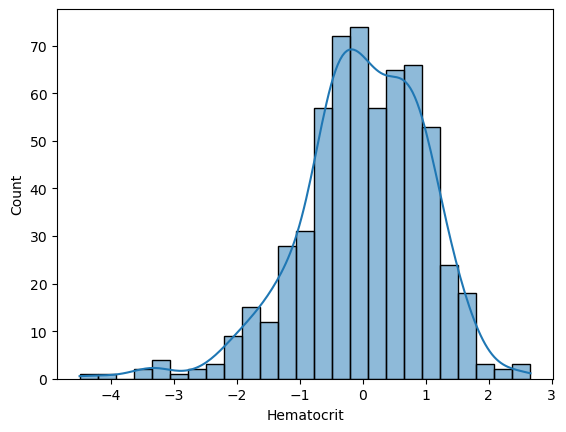

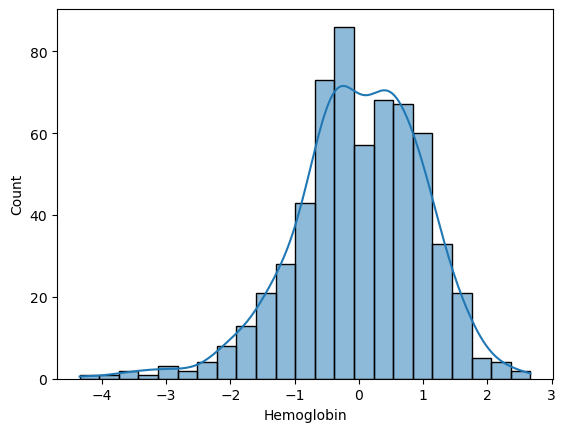

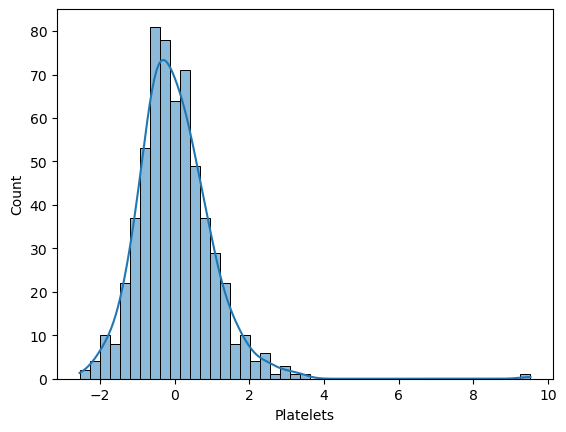

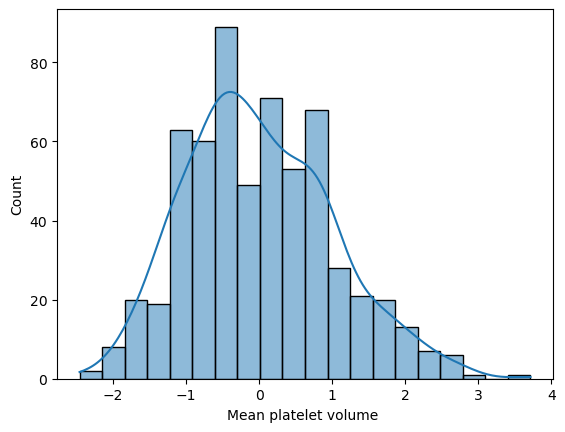

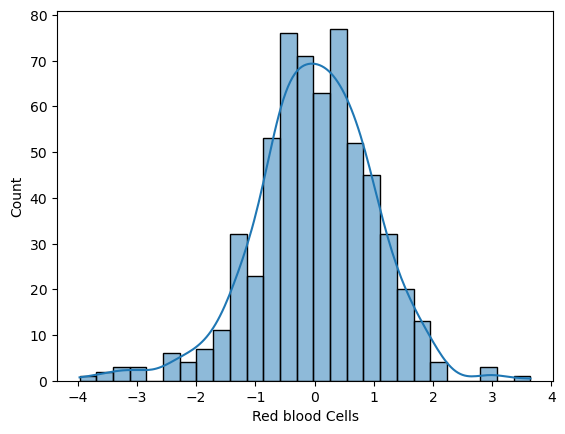

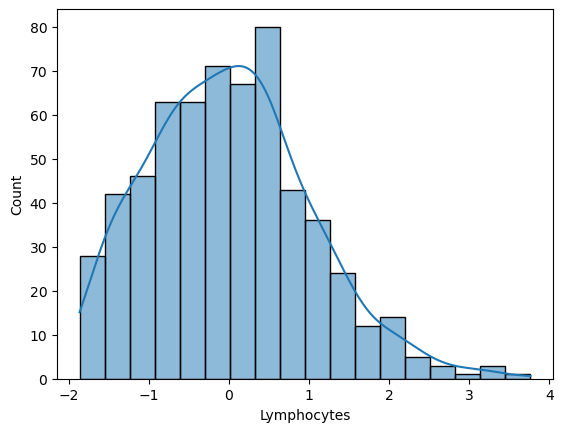

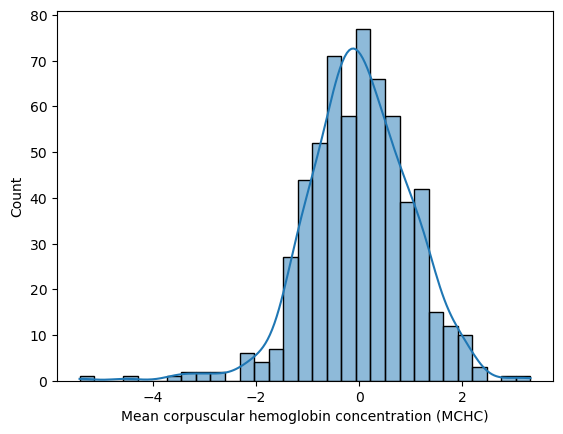

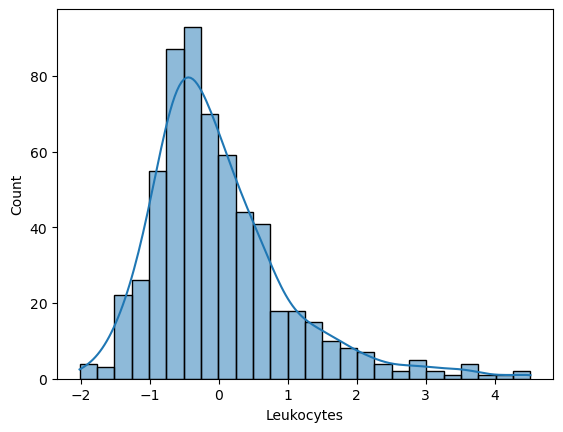

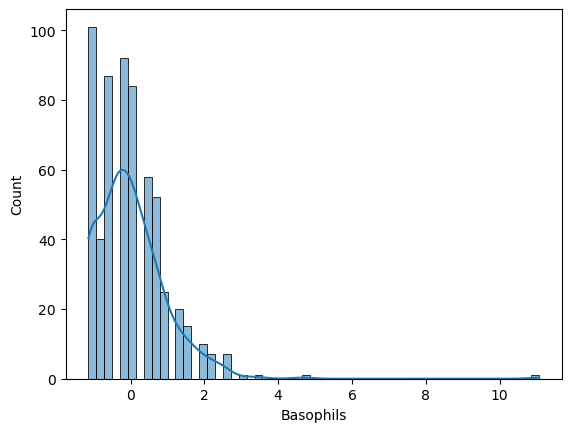

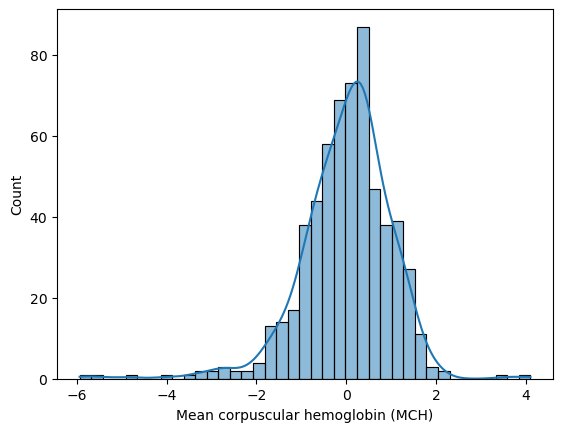

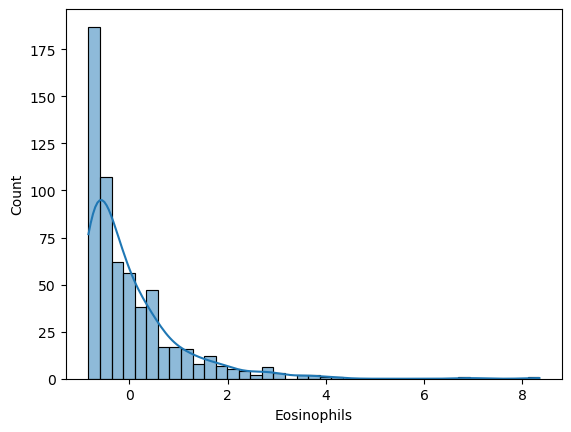

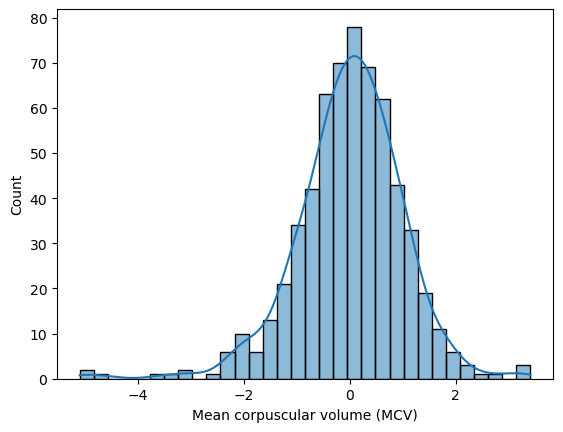

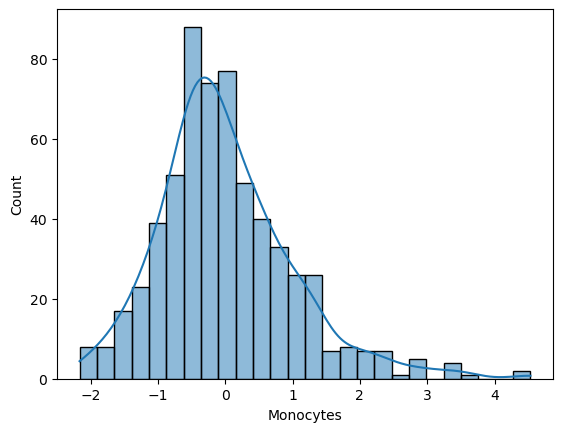

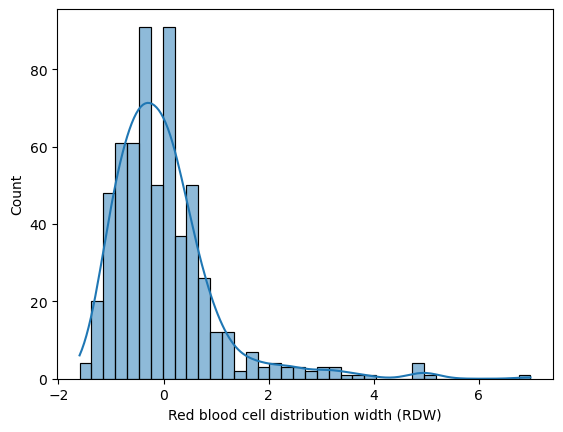

In [29]:
for col in df.select_dtypes("float"):
    plt.figure()
    sns.histplot(df[col], kde=True) # distplot(df[col]) n'existe plus dans notre version actuel
    plt.show()

<Axes: xlabel='Patient age quantile', ylabel='Count'>

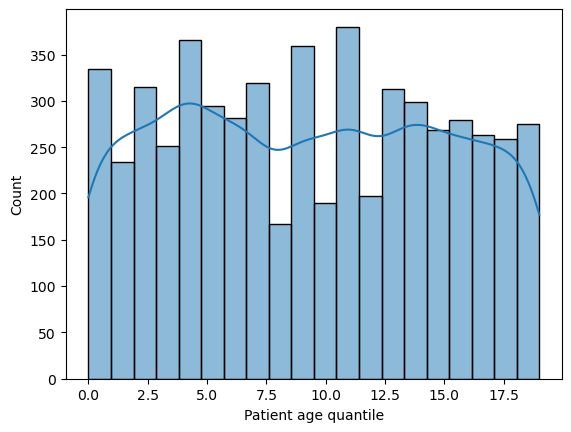

In [30]:
sns.histplot(df["Patient age quantile"],kde=True, bins = 20)

In [31]:
df["Patient age quantile"].value_counts()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

## Variable qualitatives


In [32]:
df["SARS-Cov-2 exam result"].unique()

array(['negative', 'positive'], dtype=object)

In [33]:
for col in df.select_dtypes("object"):
    print(f"{col :-<50}: {df[col].unique()}")

SARS-Cov-2 exam result----------------------------: ['negative' 'positive']
Respiratory Syncytial Virus-----------------------: [nan 'not_detected' 'detected']
Influenza A---------------------------------------: [nan 'not_detected' 'detected']
Influenza B---------------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------: [nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------: [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------: [nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------: [nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------: [nan 'not_detected' 'detected']
Adenovirus----------------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------: [nan 'not_detected' 'detected']


In [34]:
for col in df.select_dtypes("object"):
    print(f"{col :<50}: {df[col].unique()}")

SARS-Cov-2 exam result                            : ['negative' 'positive']
Respiratory Syncytial Virus                       : [nan 'not_detected' 'detected']
Influenza A                                       : [nan 'not_detected' 'detected']
Influenza B                                       : [nan 'not_detected' 'detected']
Parainfluenza 1                                   : [nan 'not_detected' 'detected']
CoronavirusNL63                                   : [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus                            : [nan 'detected' 'not_detected']
Coronavirus HKU1                                  : [nan 'not_detected' 'detected']
Parainfluenza 3                                   : [nan 'not_detected' 'detected']
Chlamydophila pneumoniae                          : [nan 'not_detected' 'detected']
Adenovirus                                        : [nan 'not_detected' 'detected']
Parainfluenza 4                                   : [nan 'not_detected' 'detected']


In [35]:
for col in df.select_dtypes("object"):
    print(f"{col :-<20}: {df[col].unique()}")

SARS-Cov-2 exam result: ['negative' 'positive']
Respiratory Syncytial Virus: [nan 'not_detected' 'detected']
Influenza A---------: [nan 'not_detected' 'detected']
Influenza B---------: [nan 'not_detected' 'detected']
Parainfluenza 1-----: [nan 'not_detected' 'detected']
CoronavirusNL63-----: [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus: [nan 'detected' 'not_detected']
Coronavirus HKU1----: [nan 'not_detected' 'detected']
Parainfluenza 3-----: [nan 'not_detected' 'detected']
Chlamydophila pneumoniae: [nan 'not_detected' 'detected']
Adenovirus----------: [nan 'not_detected' 'detected']
Parainfluenza 4-----: [nan 'not_detected' 'detected']
Coronavirus229E-----: [nan 'not_detected' 'detected']
CoronavirusOC43-----: [nan 'not_detected' 'detected']
Inf A H1N1 2009-----: [nan 'not_detected' 'detected']
Bordetella pertussis: [nan 'not_detected' 'detected']
Metapneumovirus-----: [nan 'not_detected' 'detected']
Parainfluenza 2-----: [nan 'not_detected']
Influenza B, rapid test: [nan 'n

In [36]:
for col in df.select_dtypes("object"):
    print(f"{col :-<50}: {df[col].unique()}")

SARS-Cov-2 exam result----------------------------: ['negative' 'positive']
Respiratory Syncytial Virus-----------------------: [nan 'not_detected' 'detected']
Influenza A---------------------------------------: [nan 'not_detected' 'detected']
Influenza B---------------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------: [nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------: [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------: [nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------: [nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------: [nan 'not_detected' 'detected']
Adenovirus----------------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------: [nan 'not_detected' 'detected']


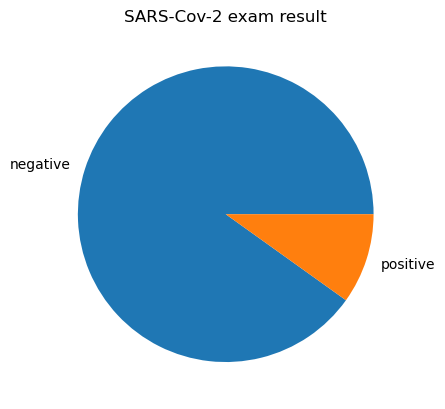

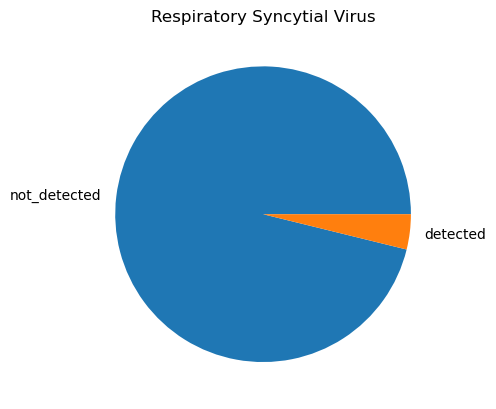

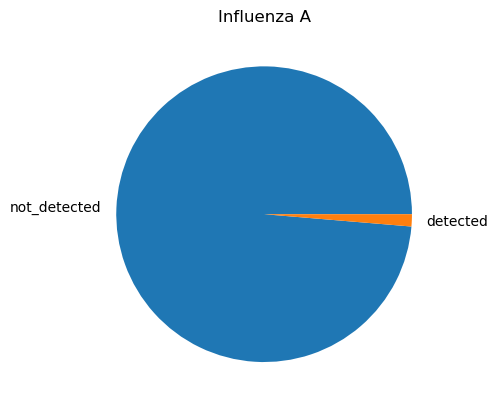

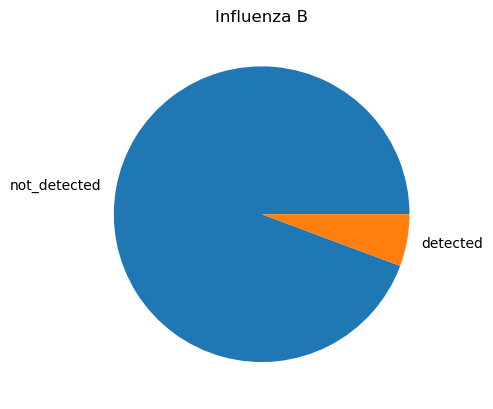

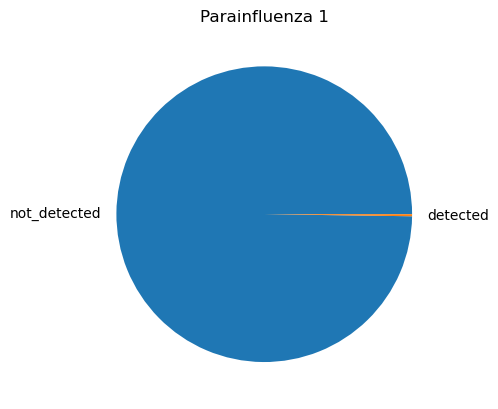

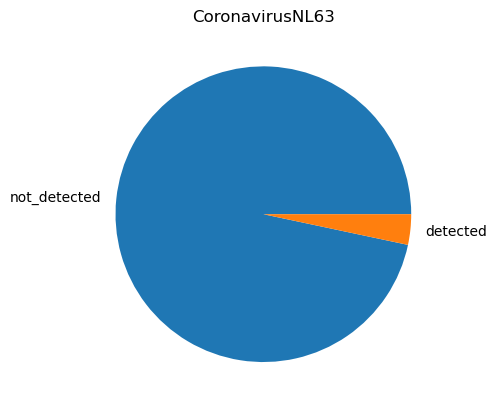

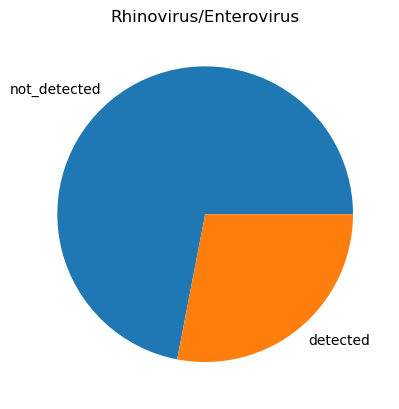

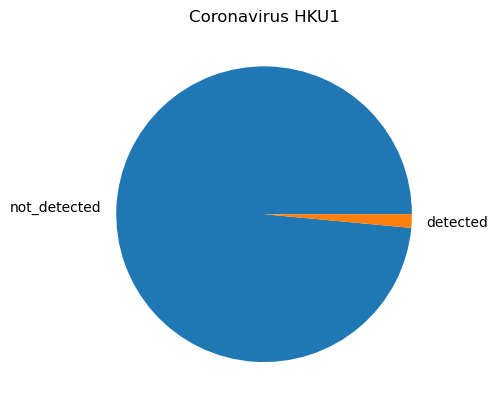

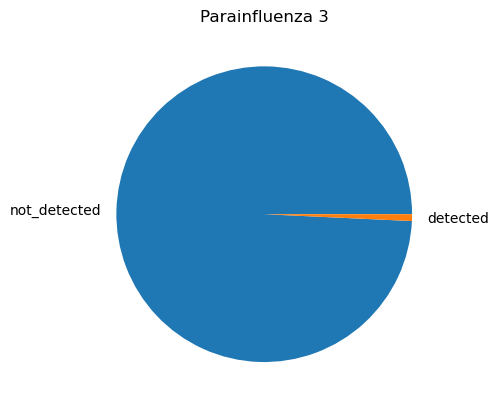

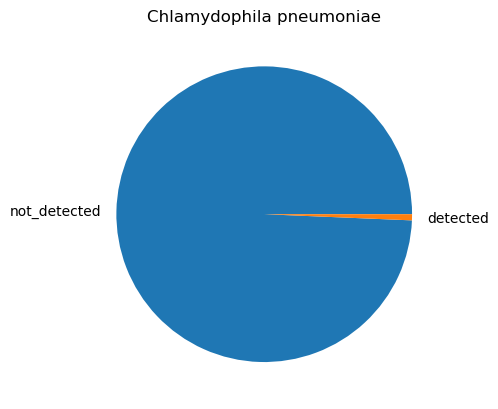

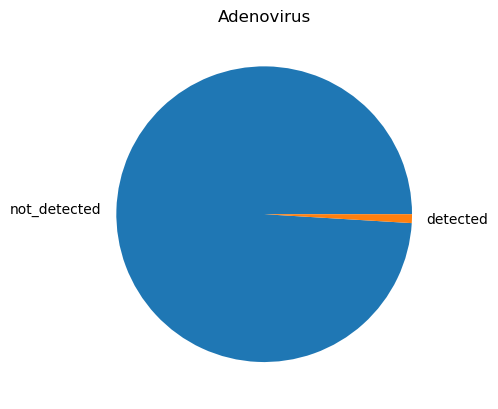

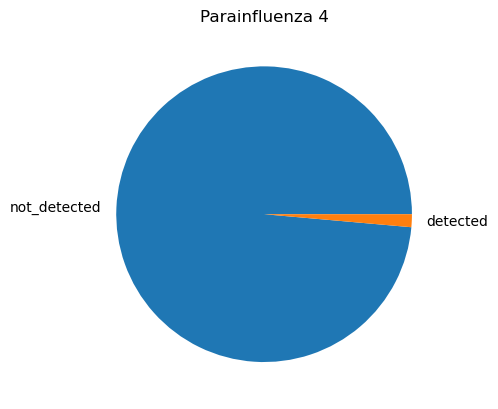

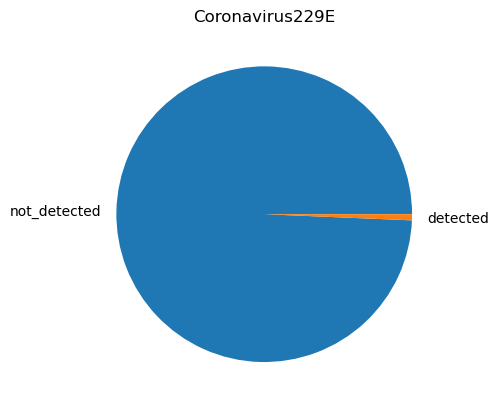

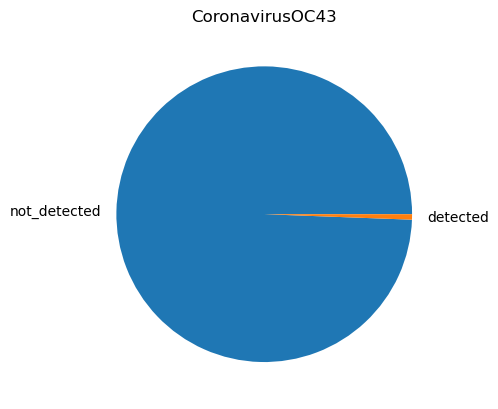

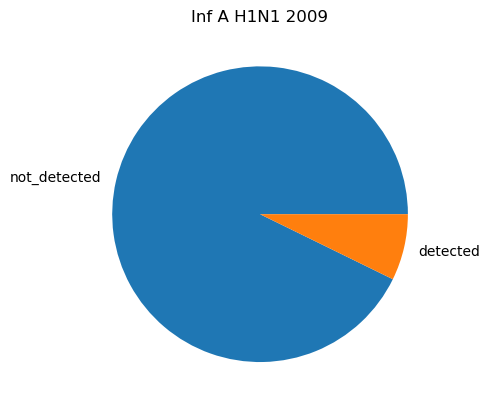

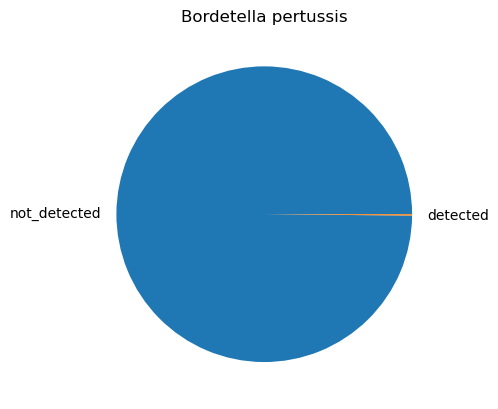

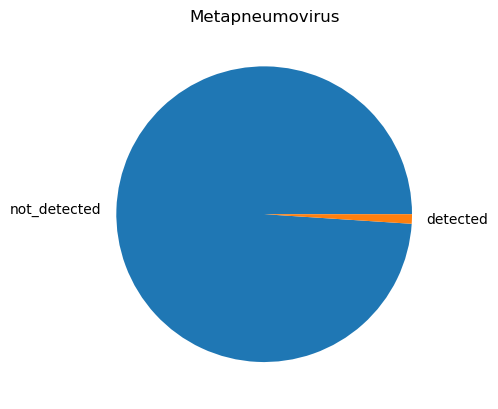

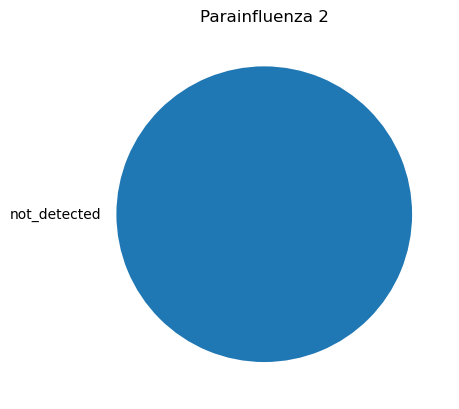

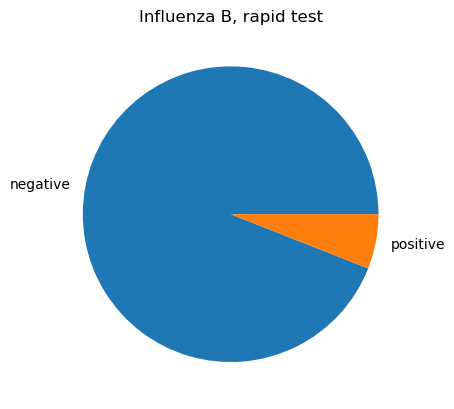

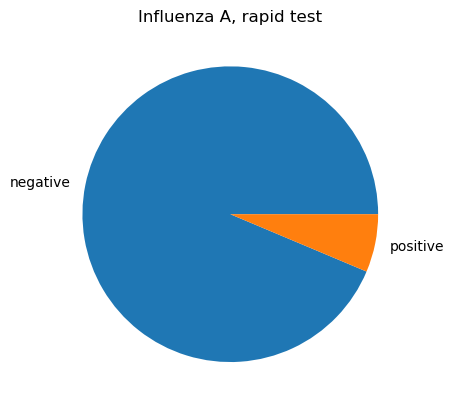

In [37]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)  # <--- ajoute le nom de la colonne
    plt.ylabel('')  # <--- enlève "y" qui s'affiche parfois par défaut
    plt.show()

## Relation Target/variable

### Creation de sous enssemble positive et négative

In [38]:
df["SARS-Cov-2 exam result"] == "positive"

0       False
1       False
2       False
3       False
4       False
        ...  
5639     True
5640    False
5641    False
5642    False
5643     True
Name: SARS-Cov-2 exam result, Length: 5644, dtype: bool

In [39]:
df[df["SARS-Cov-2 exam result"] == "positive"]

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
67           NaN        NaN                    NaN              NaN   
284          NaN        NaN                    NaN              NaN   
513          NaN        NaN                    NaN              NaN   
568     0.792188  -0.341548               1.469188         1.653476   
676          NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5632         NaN        NaN                    NaN              NaN   
5633         NaN        NaN                    NaN              NaN   
5634         NaN        NaN                    NaN              NaN   
5639         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
67            NaN                                               NaN   
284           NaN                          

### creation de sous enssemble négative

In [40]:
positif_df=df[df["SARS-Cov-2 exam result"] == "positive"]
negatif_df=df[df["SARS-Cov-2 exam result"] == "negative"]

### création de Blood et Viral

In [41]:
missing_rate = df.isna().sum()/df.shape[0]

In [42]:
missing_rate < 0.9

Patient age quantile                                     True
SARS-Cov-2 exam result                                   True
Patient addmited to regular ward (1=yes, 0=no)           True
Patient addmited to semi-intensive unit (1=yes, 0=no)    True
Patient addmited to intensive care unit (1=yes, 0=no)    True
Hematocrit                                               True
Hemoglobin                                               True
Platelets                                                True
Mean platelet volume                                     True
Red blood Cells                                          True
Lymphocytes                                              True
Mean corpuscular hemoglobin concentration (MCHC)         True
Leukocytes                                               True
Basophils                                                True
Mean corpuscular hemoglobin (MCH)                        True
Eosinophils                                              True
Mean cor

In [43]:
(missing_rate < 0.9) & (missing_rate > 0.8)

Patient age quantile                                     False
SARS-Cov-2 exam result                                   False
Patient addmited to regular ward (1=yes, 0=no)           False
Patient addmited to semi-intensive unit (1=yes, 0=no)    False
Patient addmited to intensive care unit (1=yes, 0=no)    False
Hematocrit                                                True
Hemoglobin                                                True
Platelets                                                 True
Mean platelet volume                                      True
Red blood Cells                                           True
Lymphocytes                                               True
Mean corpuscular hemoglobin concentration (MCHC)          True
Leukocytes                                                True
Basophils                                                 True
Mean corpuscular hemoglobin (MCH)                         True
Eosinophils                                            

In [44]:
df.columns[(missing_rate < 0.9) & (missing_rate > 0.8)]

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [45]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.8)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

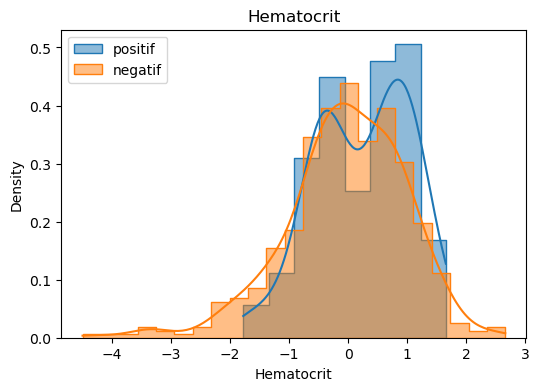

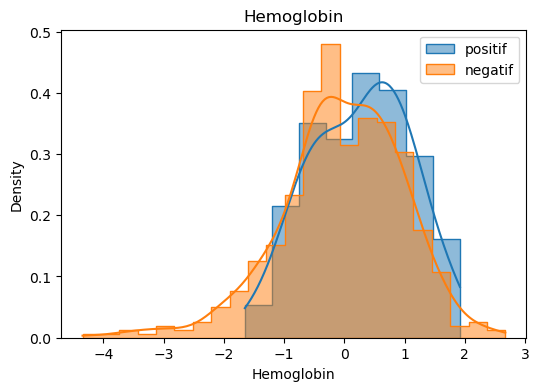

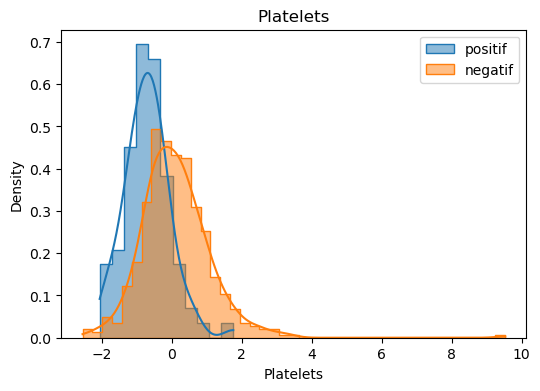

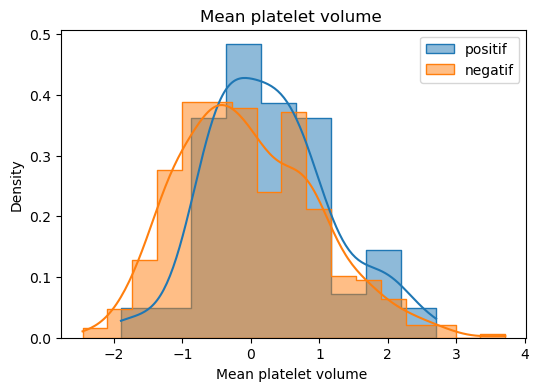

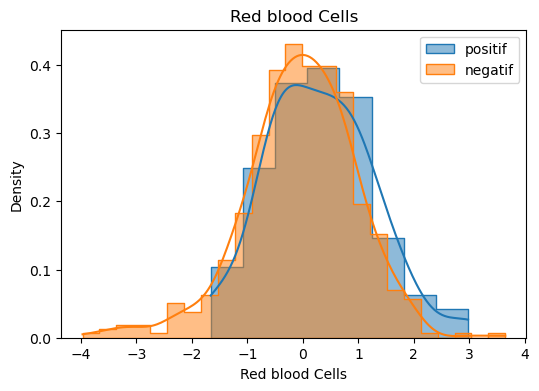

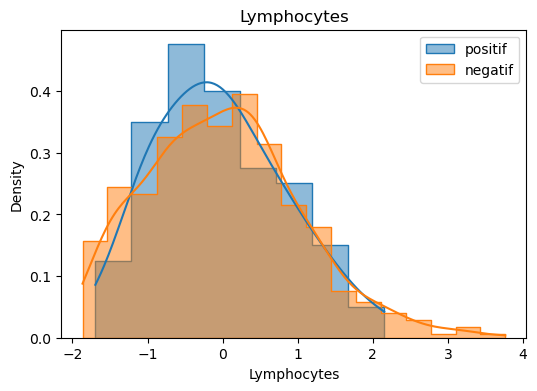

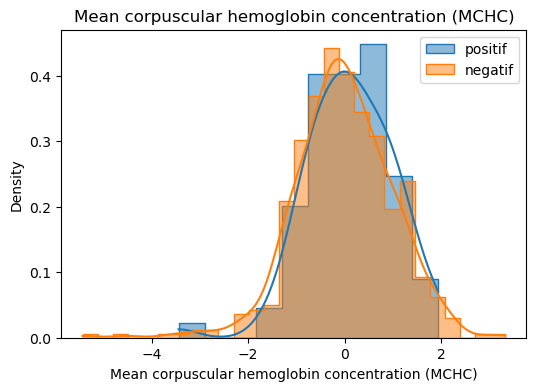

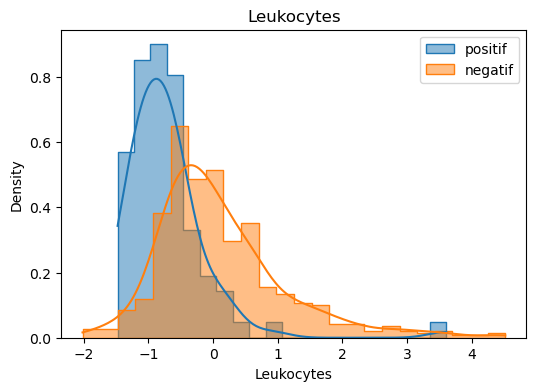

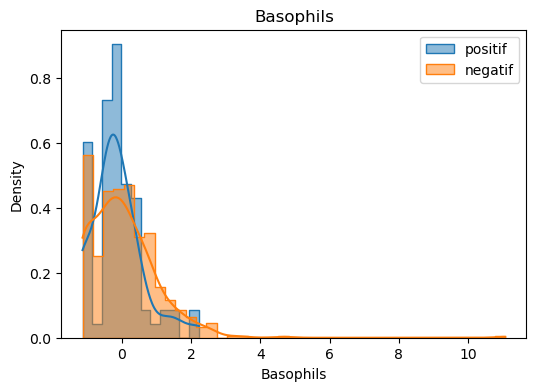

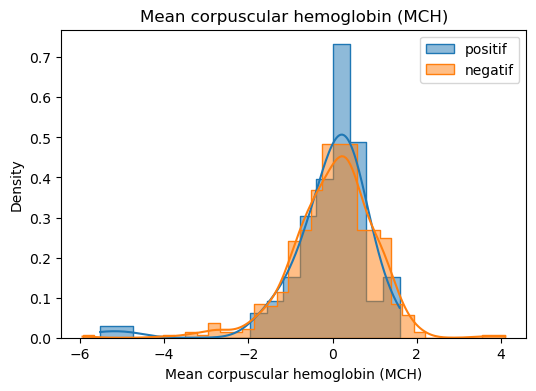

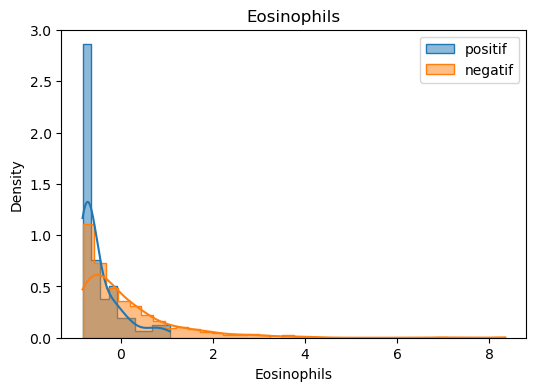

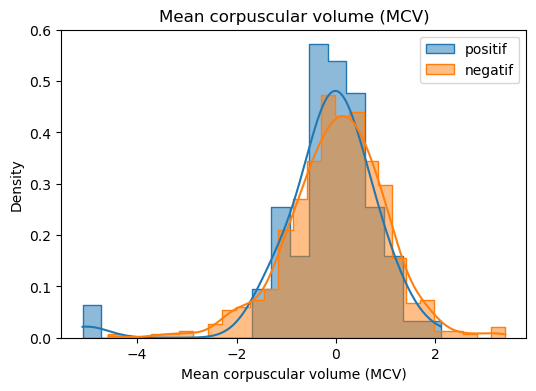

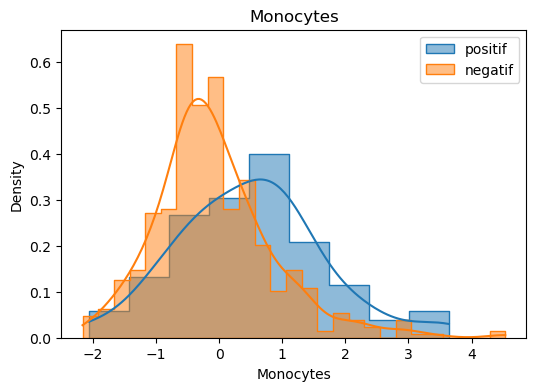

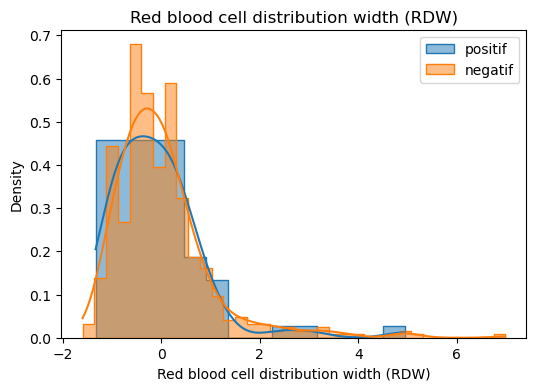

In [46]:
for col in blood_columns:
    if pd.api.types.is_numeric_dtype(positif_df[col]):
        plt.figure(figsize=(6, 4))

        sns.histplot(positif_df[col], kde=True, label="positif",
                     stat="density", element="step", common_norm=False )
        sns.histplot(negatif_df[col], kde=True, label="negatif",
                     stat="density", element="step", common_norm=False)

        plt.legend()
        plt.title(col)
        plt.show()




## Relation Target/age

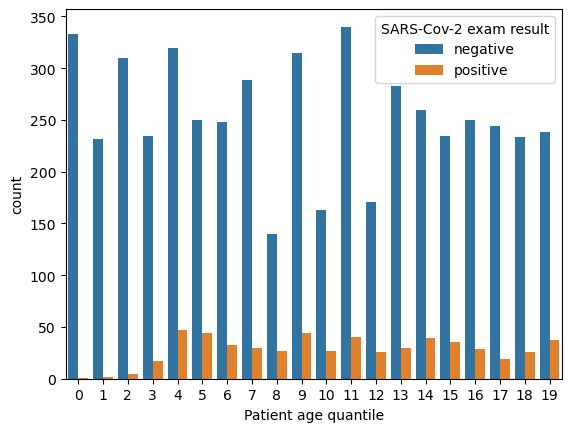

In [47]:
sns.countplot(x="Patient age quantile", hue="SARS-Cov-2 exam result", data=df)
plt.show()

## Relation Target/Viral

In [48]:
pd.crosstab(df["SARS-Cov-2 exam result"],df["Influenza A"])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

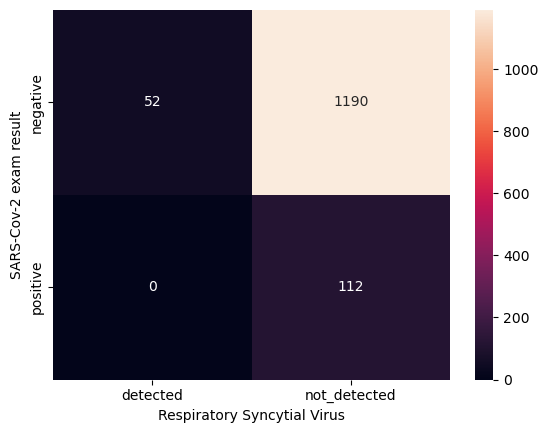

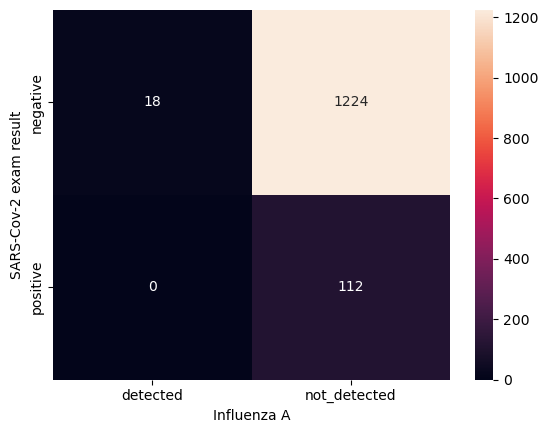

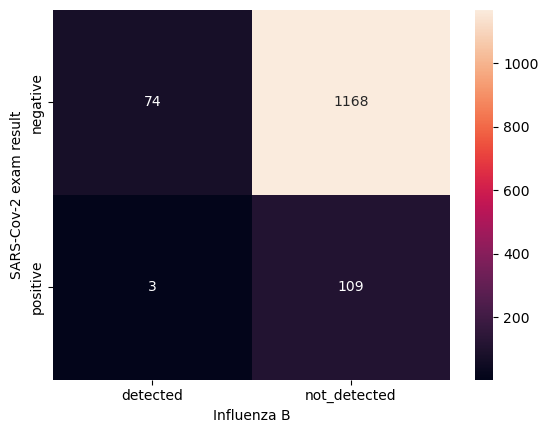

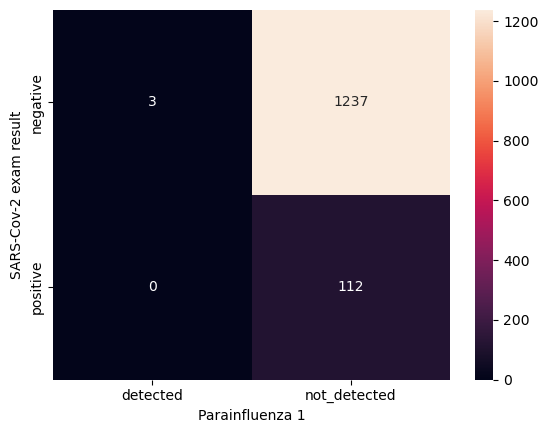

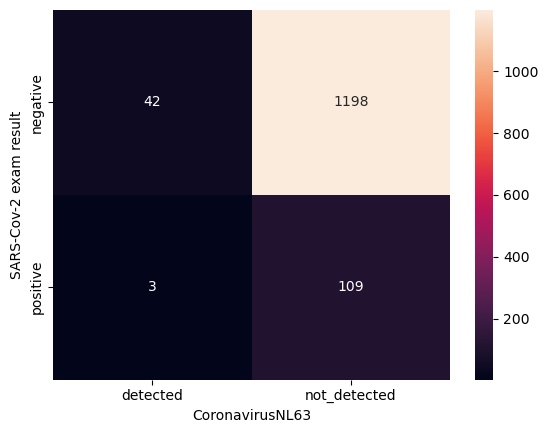

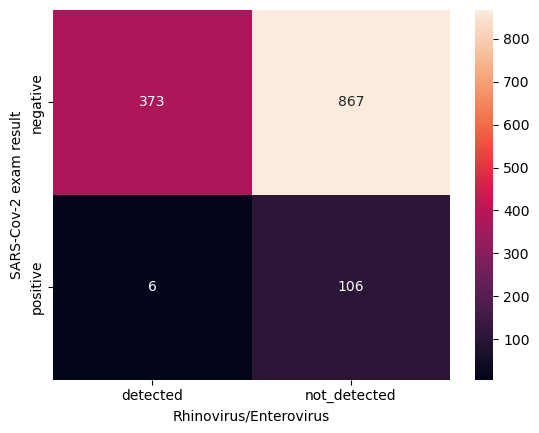

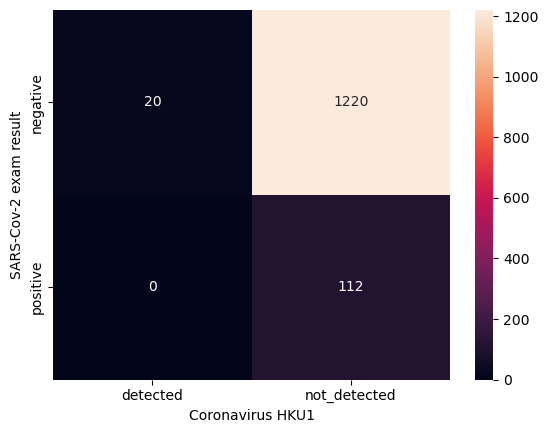

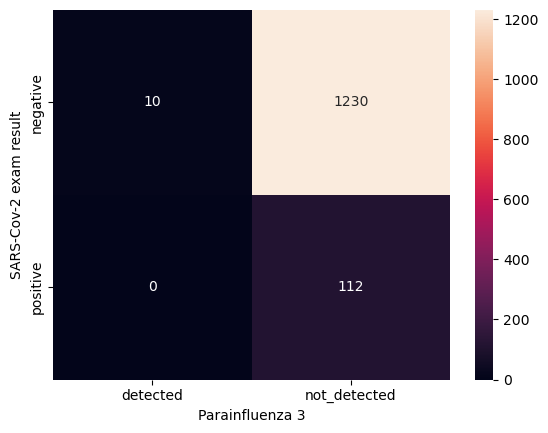

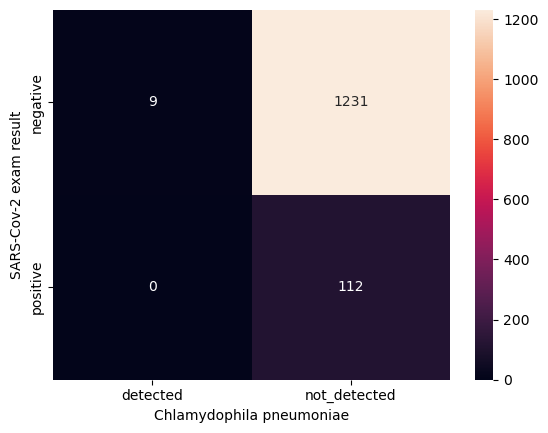

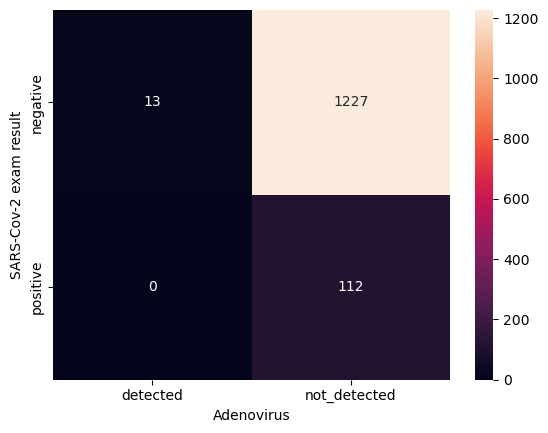

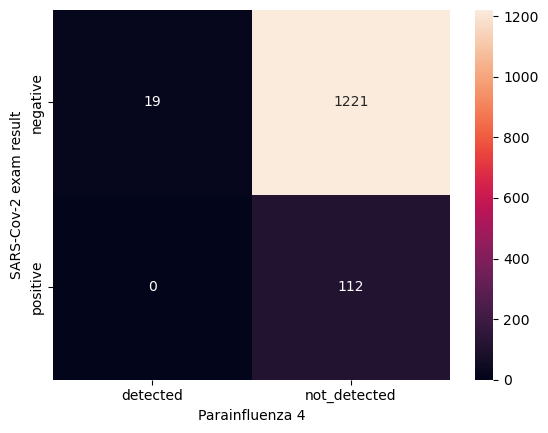

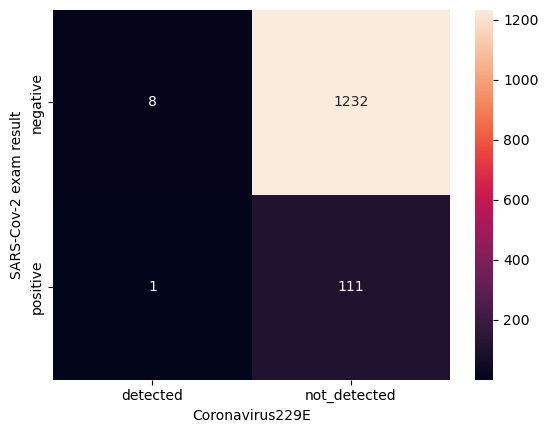

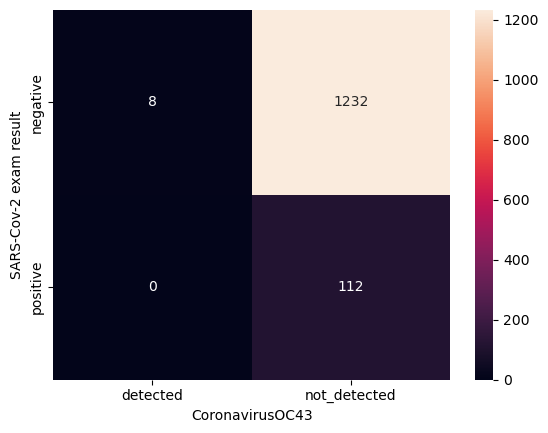

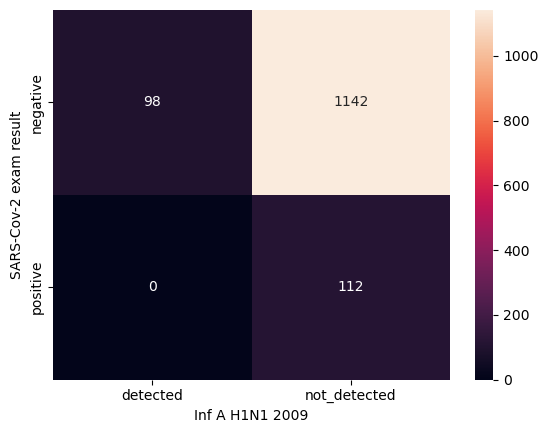

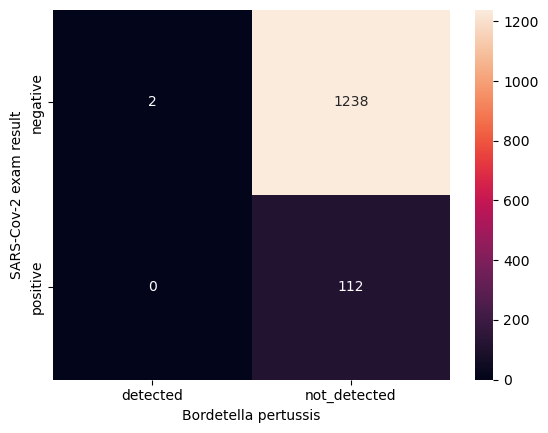

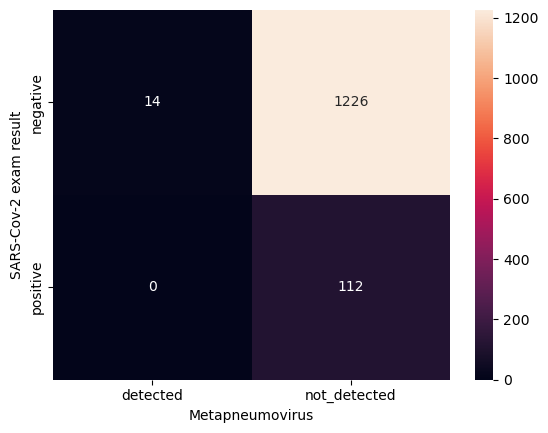

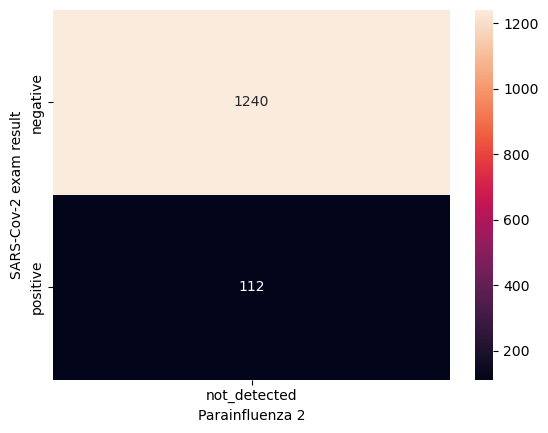

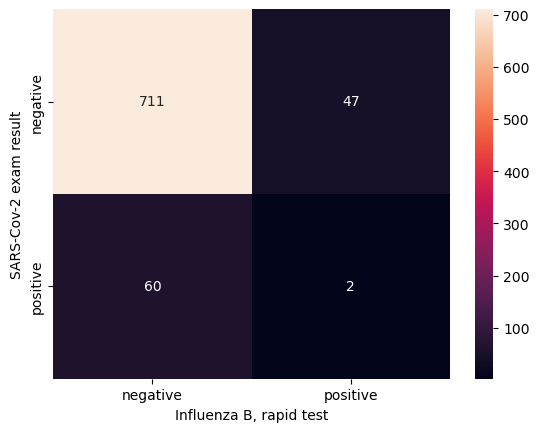

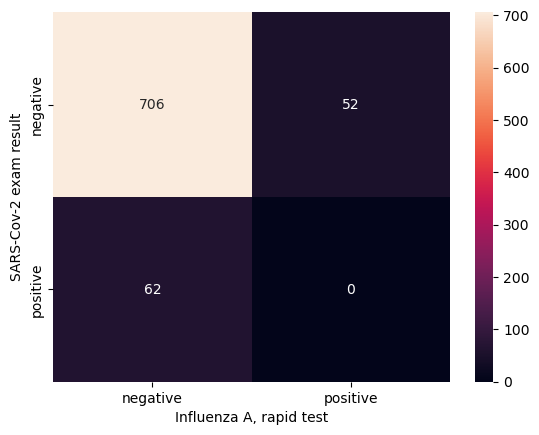

In [49]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df["SARS-Cov-2 exam result"],df[col]), annot=True, fmt='d')

## Analyse un peu plus avancé

### relation variable / variable

#### relation taux sanguins

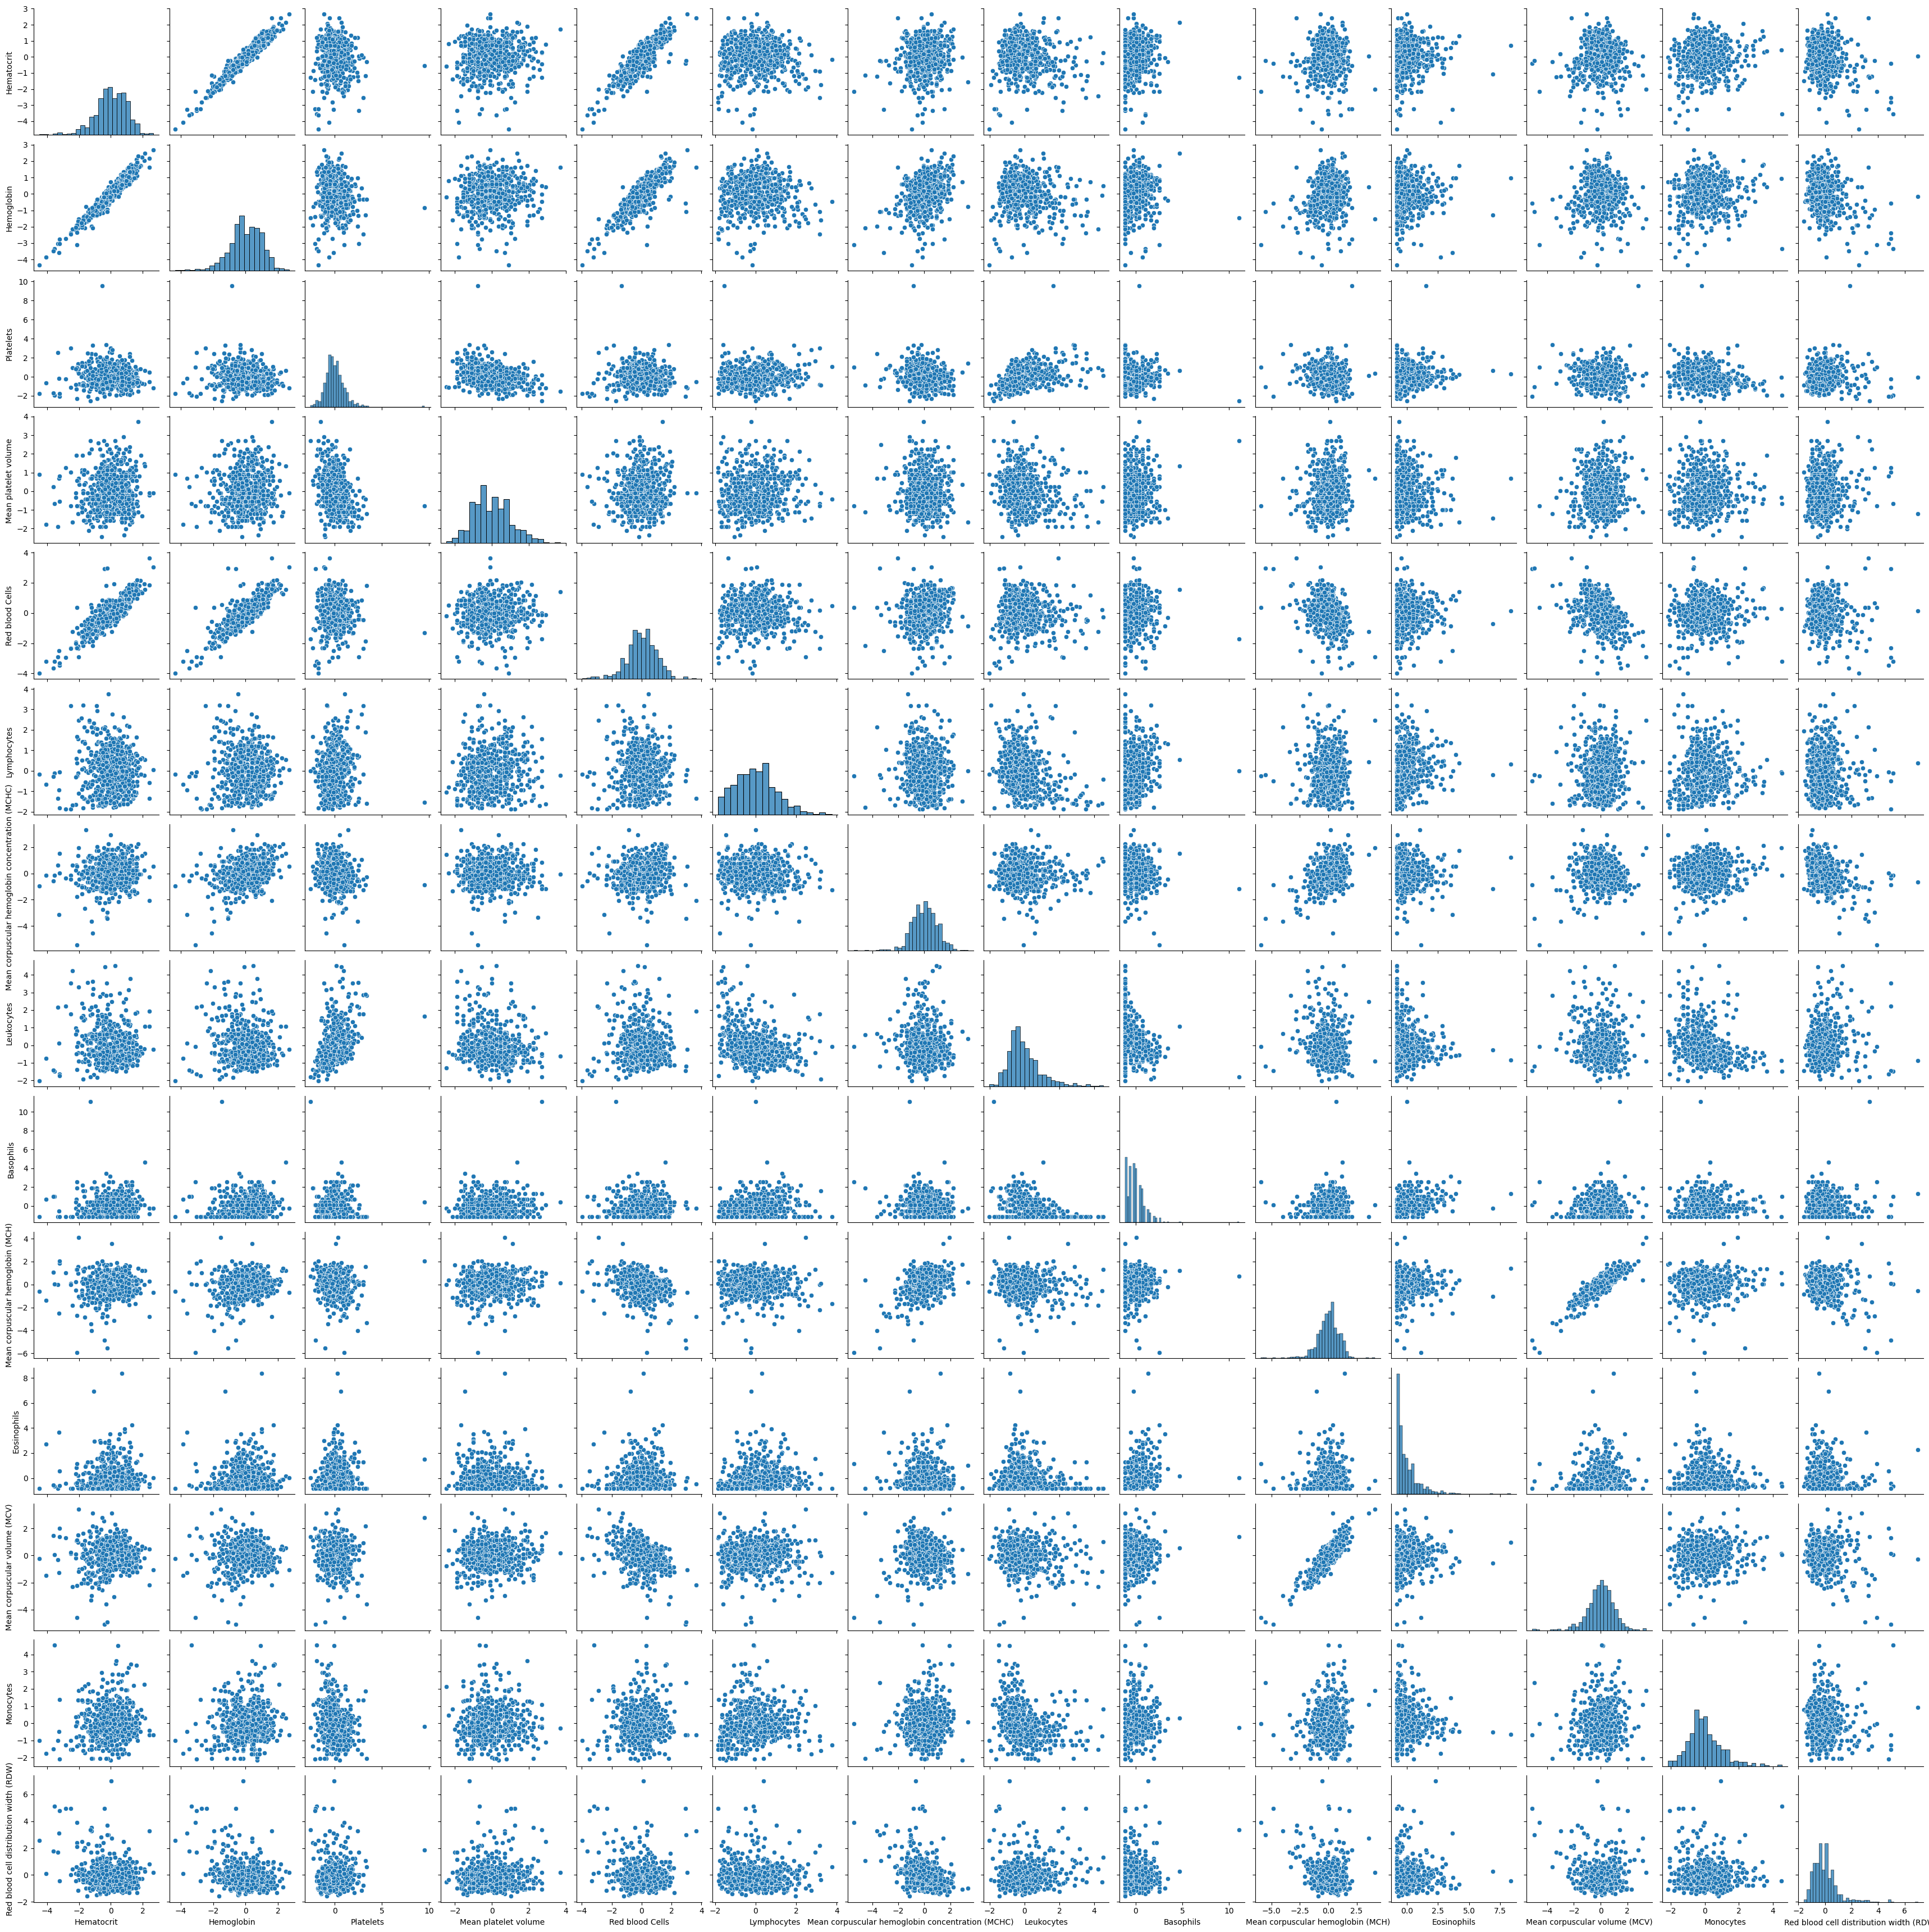

In [50]:
sns.pairplot(df[blood_columns])

<Axes: >

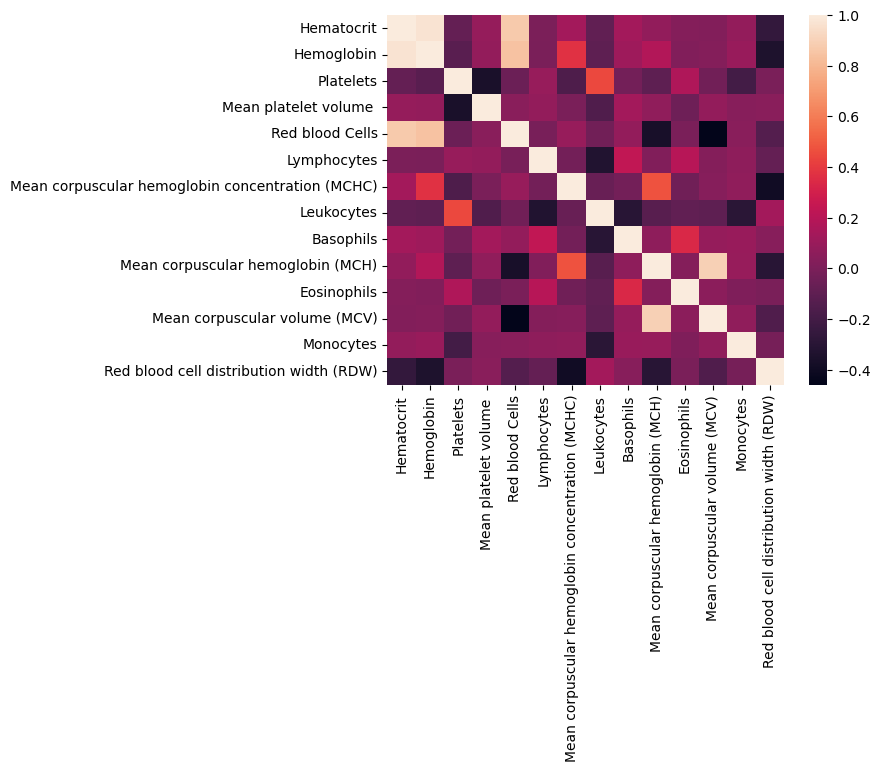

In [51]:
sns.heatmap(df[blood_columns].corr(numeric_only=True))

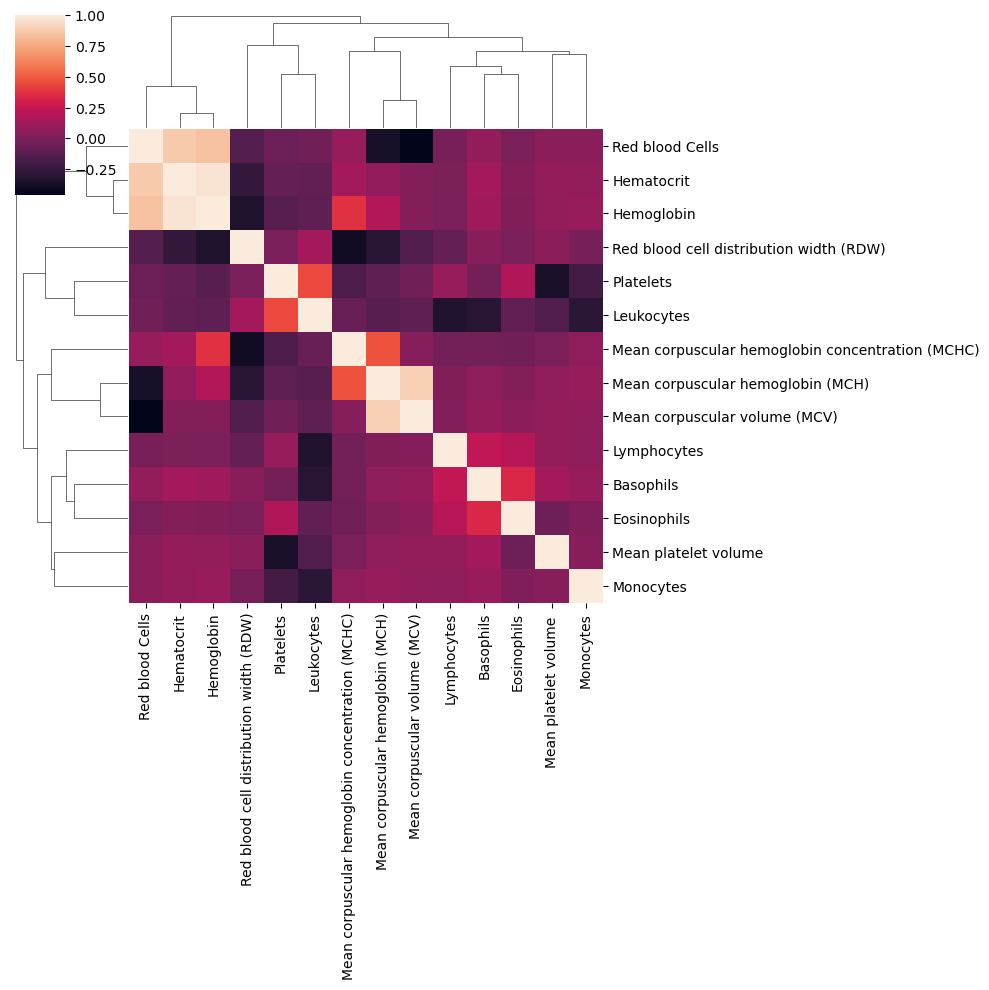

In [52]:
sns.clustermap(df[blood_columns].corr(numeric_only=True))

#### Relation Age / Sang

<Figure size 640x480 with 0 Axes>

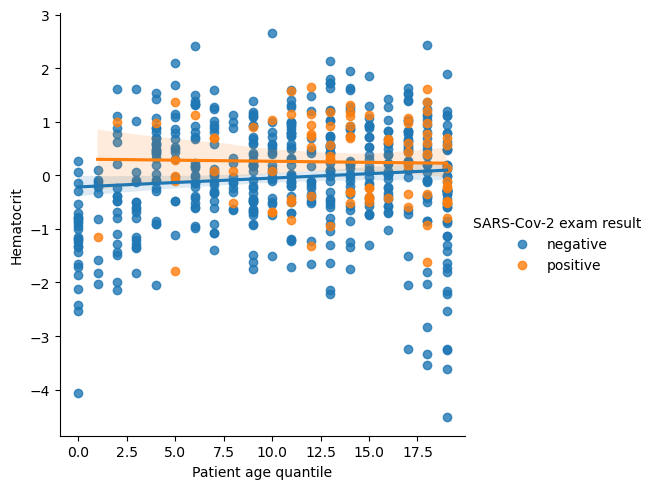

<Figure size 640x480 with 0 Axes>

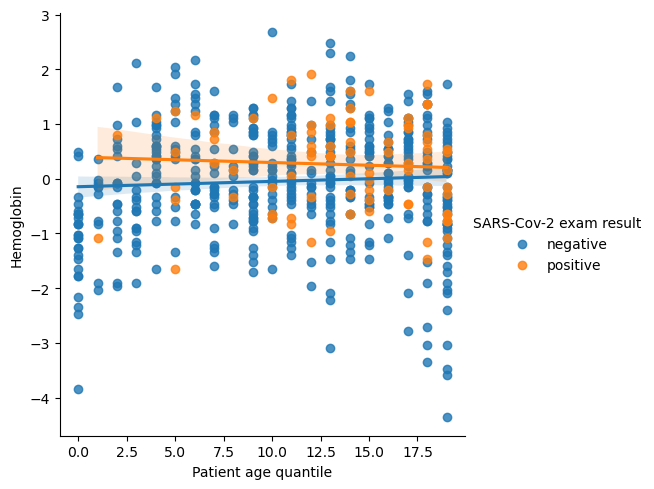

<Figure size 640x480 with 0 Axes>

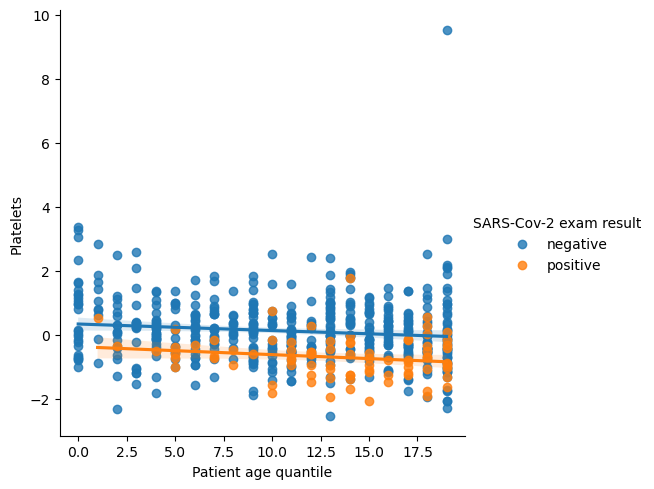

<Figure size 640x480 with 0 Axes>

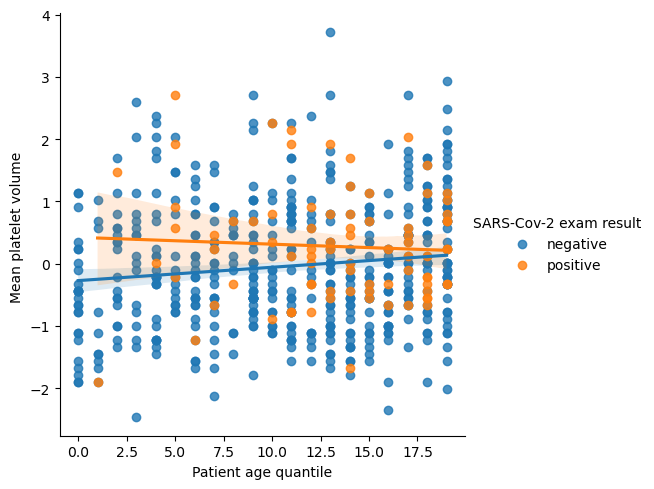

<Figure size 640x480 with 0 Axes>

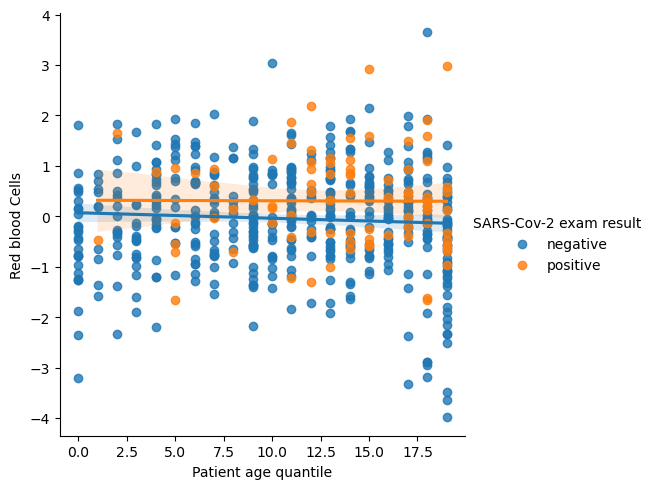

<Figure size 640x480 with 0 Axes>

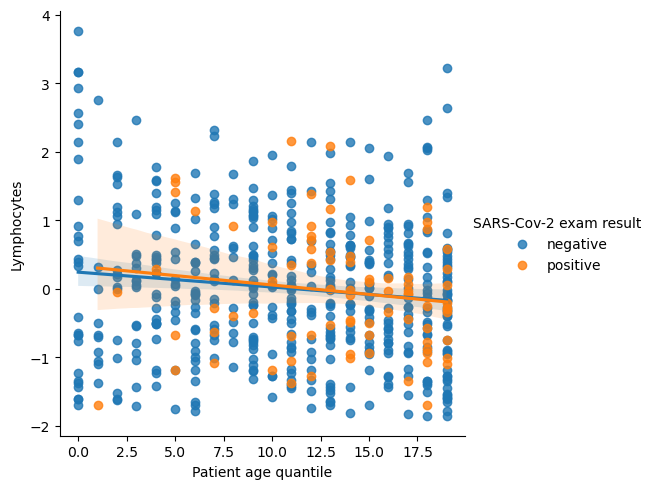

<Figure size 640x480 with 0 Axes>

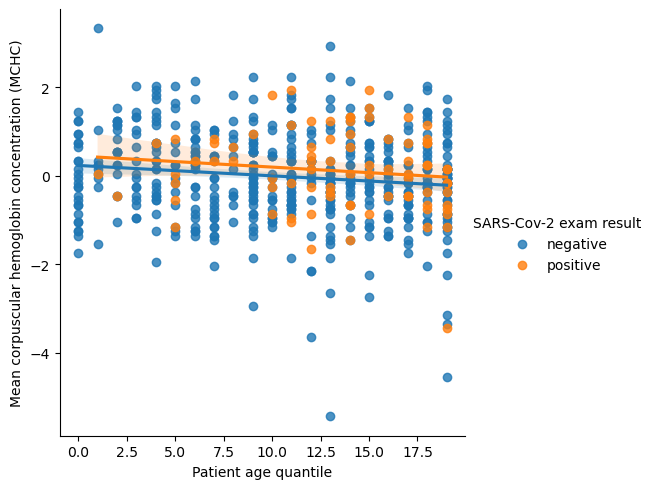

<Figure size 640x480 with 0 Axes>

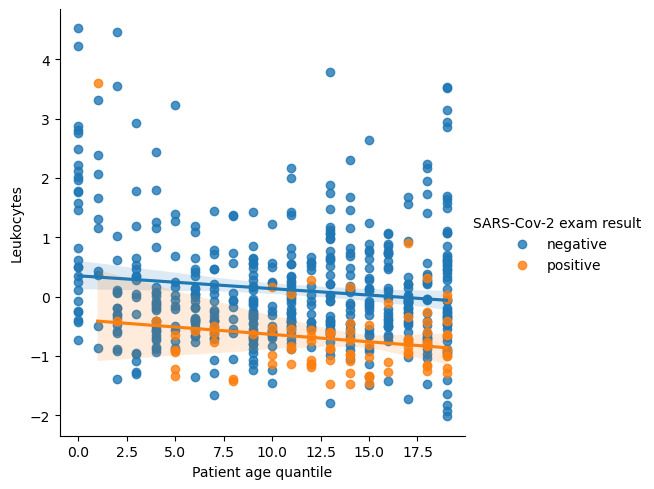

<Figure size 640x480 with 0 Axes>

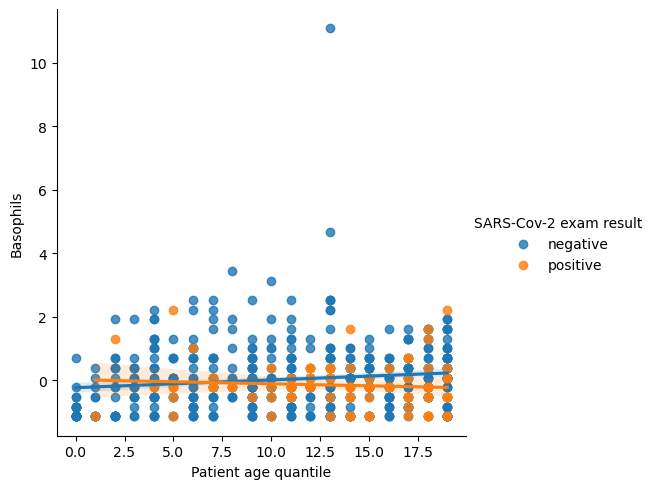

<Figure size 640x480 with 0 Axes>

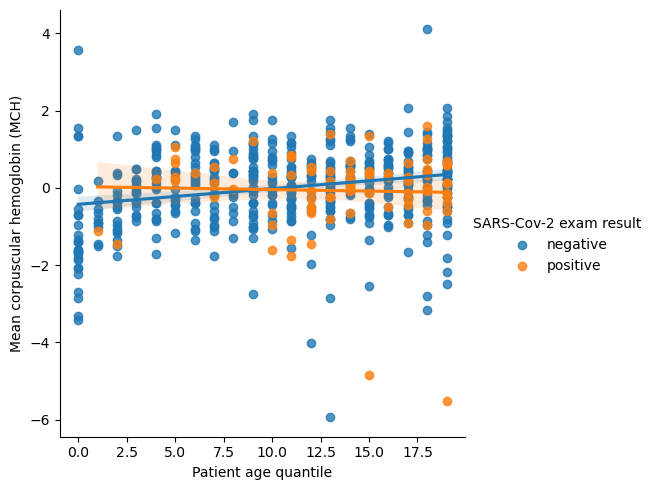

<Figure size 640x480 with 0 Axes>

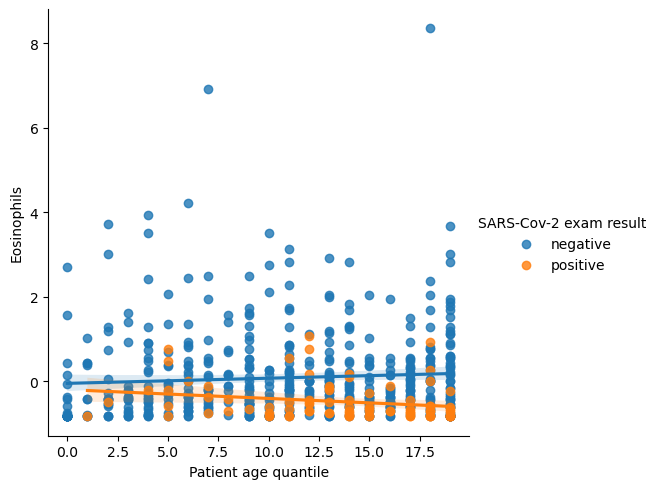

<Figure size 640x480 with 0 Axes>

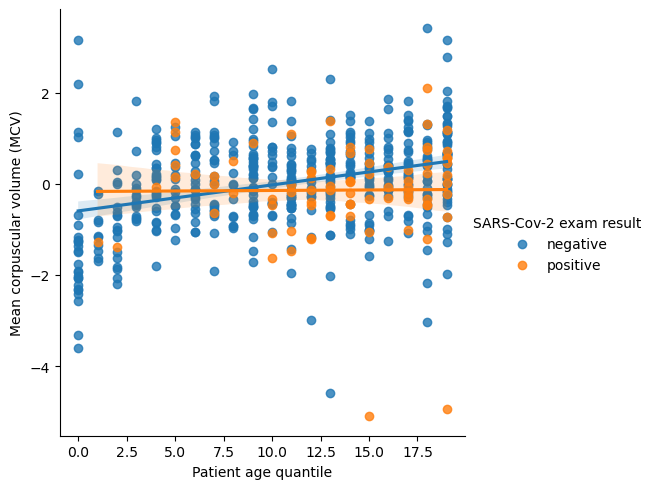

<Figure size 640x480 with 0 Axes>

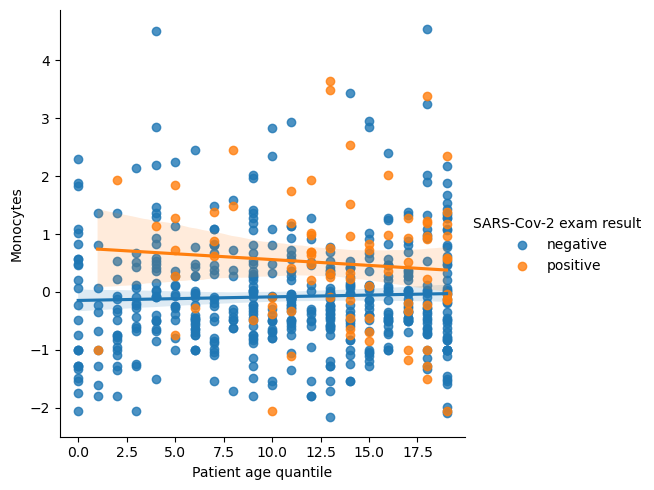

<Figure size 640x480 with 0 Axes>

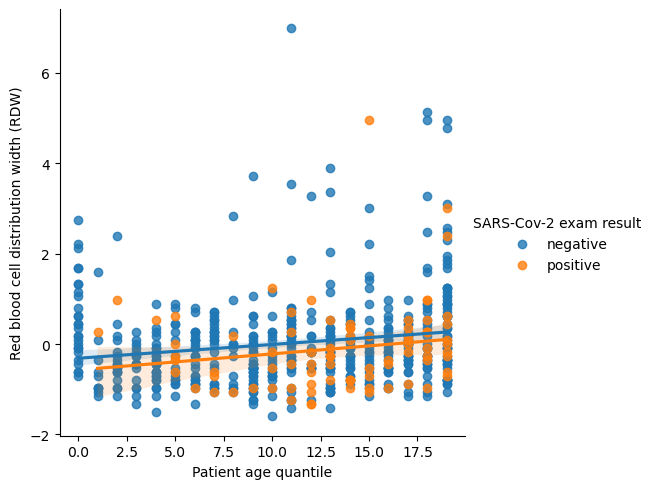

In [53]:
for col in blood_columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure()
        sns.lmplot(x="Patient age quantile", y=col, hue="SARS-Cov-2 exam result", data=df)
        plt.show()

In [54]:
df.corr(numeric_only=True)

Patient age quantile  \
Patient age quantile                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   
Patient addmited to intensive care unit (1=yes,...             -0.035772   
Hematocrit                                                      0.096808   
Hemoglobin                                                      0.060320   
Platelets                                                      -0.158683   
Mean platelet volume                                            0.119449   
Red blood Cells                                                -0.037510   
Lymphocytes                                                    -0.125935   
Mean corpuscular hemoglobin concentration (MCHC)               -0.124671   
Leukocytes                                                     -0.166386   
Basophils                                                       0.107525   
Mean corpuscular hemoglobin (MCH)                               0.197394   
Eosinophils                                                     0.022085   
Mean corpuscular volume (MCV)                                   0.281655   
Monocytes                                                       0.050962   
Red blood cell distribution width (RDW)                         0.166429   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.046166   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                       -0.011264   
Patient addmited to intensive care unit (1=yes,...                                       -0.010192   
Hematocrit                                                                               -0.087241   
Hemoglobin                                                                               -0.091867   
Platelets                                                                                -0.183091   
Mean platelet volume                                                                     -0.013134   
Red blood Cells                                                                          -0.053143   
Lymphocytes                                                                              -0.095313   
Mean corpuscular hemoglobin concentration (MCHC)                                         -0.034642   
Leukocytes                                                                               -0.103005   
Basophils                                                                                 0.031833   
Mean corpuscular hemoglobin (MCH)                                                        -0.050703   
Eosinophils                                                                              -0.085636   
Mean corpuscular volume (MCV)                                                            -0.039326   
Monocytes                                                                                -0.000354   
Red blood cell distribution width (RDW)                                                   0.102160   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.015736       
Patient addmited to regular ward (1=yes, 0=no)                                              -0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       
Patient addmited to intensive care unit (1=yes,...                                          -0.008087       
Hematocrit                                                                                  -0.182215       
Hemoglobin    

In [55]:
df.corr(numeric_only=True)["Patient age quantile"]

Patient age quantile                                     1.000000
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Hematocrit                                               0.096808
Hemoglobin                                               0.060320
Platelets                                               -0.158683
Mean platelet volume                                     0.119449
Red blood Cells                                         -0.037510
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Leukocytes                                              -0.166386
Basophils                                                0.107525
Mean corpuscular hemoglobin (MCH)                        0.197394
Eosinophils                                              0.022085
Mean corpu

In [56]:
df.corr(numeric_only=True)["Patient age quantile"].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

## Relation entre influenza et rapid test

In [57]:
pd.crosstab(df["Influenza A"],df["Influenza B, rapid test"])

Influenza B, rapid test  negative  positive
Influenza A                                
detected                        6         0
not_detected                  245        15

In [58]:
pd.crosstab(df["Influenza B"],df["Influenza A, rapid test"])

Influenza A, rapid test  negative  positive
Influenza B                                
detected                       29         0
not_detected                  218        19

#### Relation viral / sanguin

##### creation d'une nouvelle variable est malade

In [59]:
df[viral_columns[:-2]] == "detected"

Respiratory Syncytial Virus  Influenza A  Influenza B  Parainfluenza 1  \
0                           False        False        False            False   
1                           False        False        False            False   
2                           False        False        False            False   
3                           False        False        False            False   
4                           False        False        False            False   
...                           ...          ...          ...              ...   
5639                        False        False        False            False   
5640                        False        False        False            False   
5641                        False        False        False            False   
5642                        False        False        False            False   
5643                        False        False        False            False   

      CoronavirusNL63  Rhinovirus/Enterovirus  Coronavirus HKU1  \
0               False                   False             False   
1               False                    True             False   
2               False                   False             False   
3               False                   False             False   
4               False                    True             False   
...               ...                     ...               ...   
5639            False                   False             False   
5640            False                   False             False   
5641            False                   False             False   
5642            False                   False             False   
5643            False                   False             False   

      Parainfluenza 3  Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  \
0               False                     False       False            False   
1               False                     False       False            False   
2               False                     False       False            False   
3               False                     False       False            False   
4               False                     False       False            False   
...               ...                       ...         ...              ...   
5639            False                     False       False            False   
5640            False                     False       False            False   
5641            False                     False       False            False   
5642            False                     False       False            False   
5643            False                     False       False            False   

      Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0               False            False            False                 False   
1               False            False            False                 False   
2               False            False            False                 False   
3               False            False            False                 False   
4               False            False            False                 False   
...               ...              ...              ...                   ...   
5639            False            False            False                 False   
5640            False            False            False                 False   
5641            False            False            False                 False   
5642            False            False            False                 False   
5643            False            False            False                 False   

      Metapneumovirus  Parainfluenza 2  
0               False            False  
1               False            False  
2               False            False  
3               False            False  
4               False            False  
...               ...              ...  
5639            Fal

In [60]:
np.sum(df[viral_columns[:-2]] == "detected", axis=1)

0       0
1       1
2       0
3       0
4       1
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Length: 5644, dtype: int64

<Axes: >

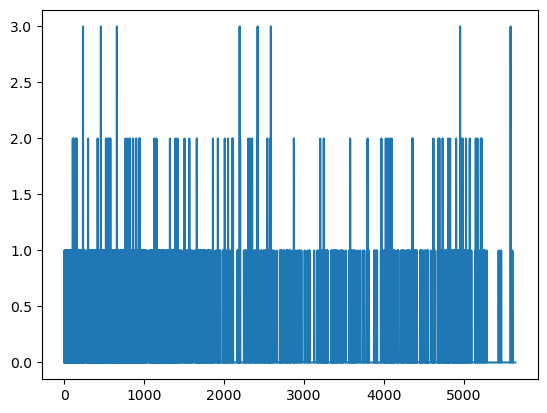

In [61]:
np.sum(df[viral_columns[:-2]] == "detected", axis=1).plot()

In [62]:
np.sum(df[viral_columns[:-2]] == "detected", axis=1) >= 1

0       False
1        True
2       False
3       False
4        True
        ...  
5639    False
5640    False
5641    False
5642    False
5643    False
Length: 5644, dtype: bool

In [63]:
df["est malade"] = np.sum(df[viral_columns[:-2]] == "detected", axis=1) >= 1

In [64]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [65]:
malade_df = df[df["est malade"] == True]
non_malade_df = df[df["est malade"] == False]

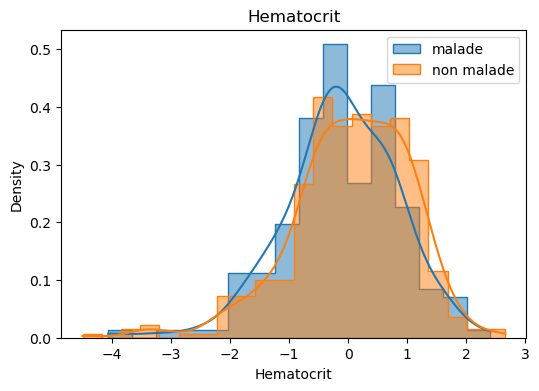

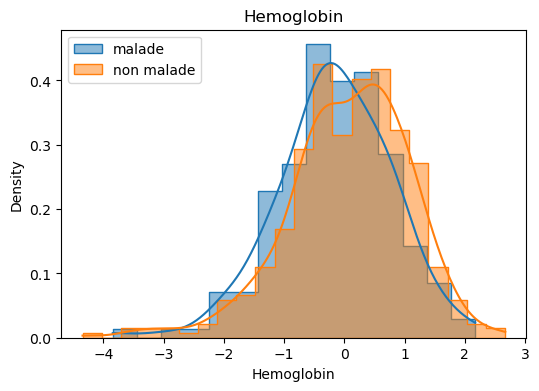

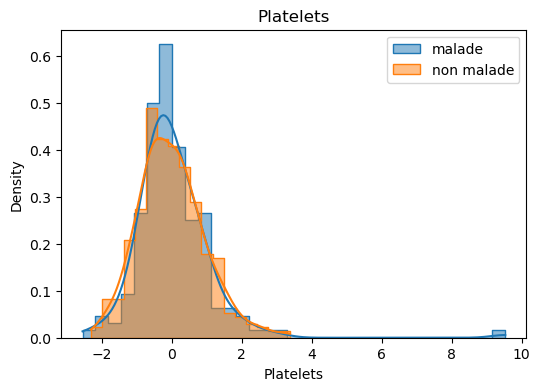

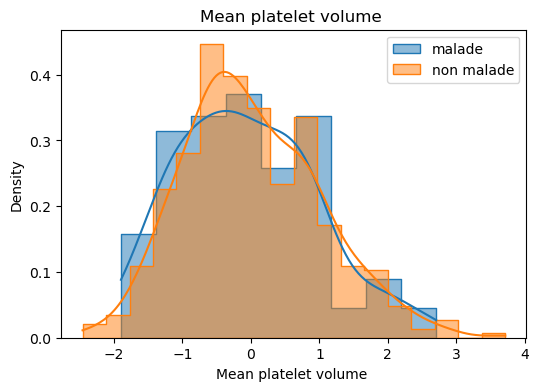

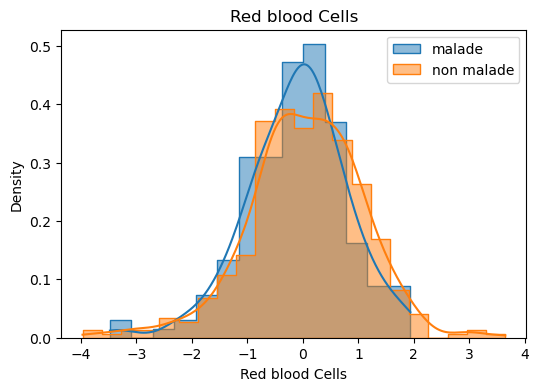

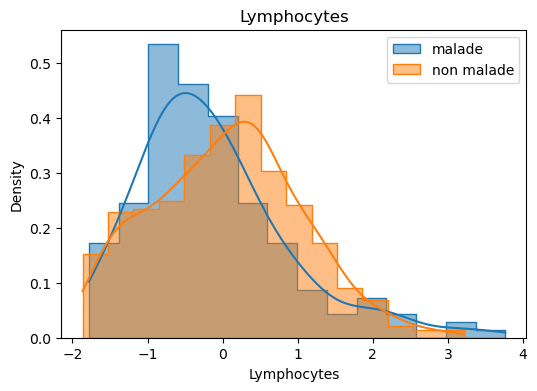

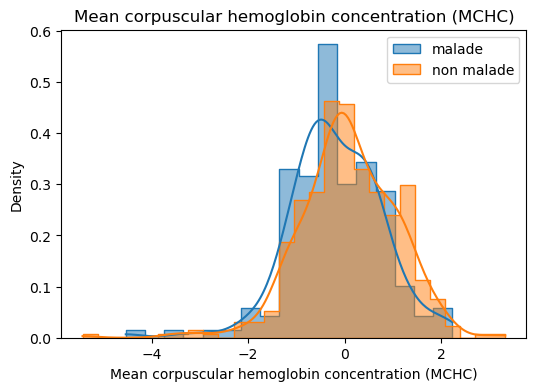

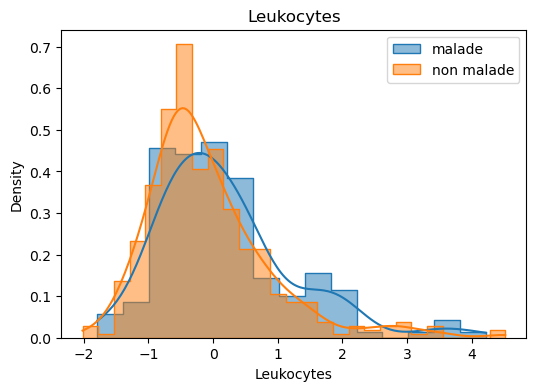

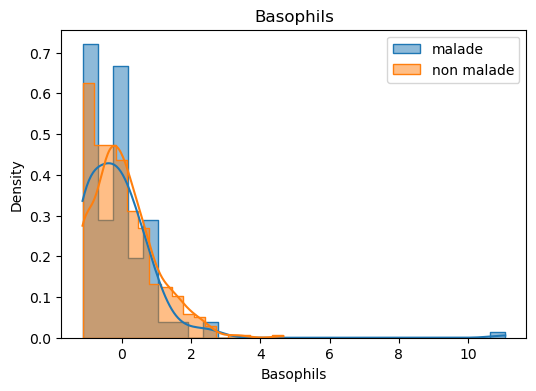

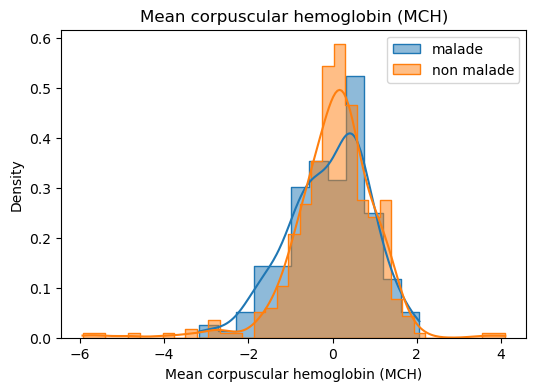

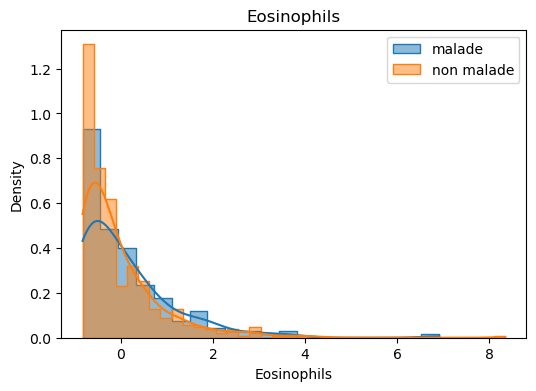

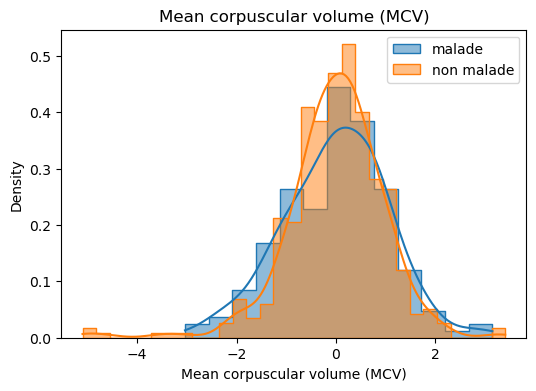

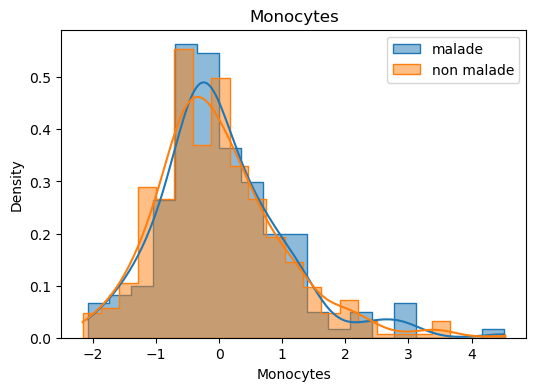

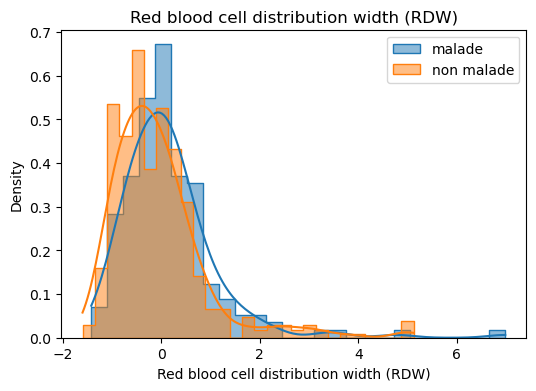

In [66]:
for col in blood_columns:
    if pd.api.types.is_numeric_dtype(positif_df[col]):
        plt.figure(figsize=(6, 4))

        sns.histplot(malade_df[col], kde=True, label="malade",
                     stat="density", element="step", common_norm=False )
        sns.histplot(non_malade_df[col], kde=True, label="non malade",
                     stat="density", element="step", common_norm=False)

        plt.legend()
        plt.title(col)
        plt.show()

In [67]:
df.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rap

In [68]:
def hospitalisation(df):
    if df["Patient addmited to regular ward (1=yes, 0=no)"] == 1:
        return "surveilliance"
    elif df["Patient addmited to semi-intensive unit (1=yes, 0=no)"] == 1:
        return "soins semi-intensive"
    elif df["Patient addmited to intensive care unit (1=yes, 0=no)"] == 1:
        return "soins fs"
    else:
        return "inconus"


In [69]:
df["statut"] = df.apply(hospitalisation, axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

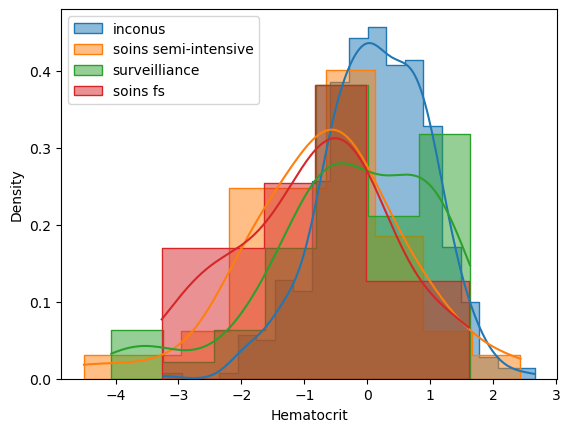

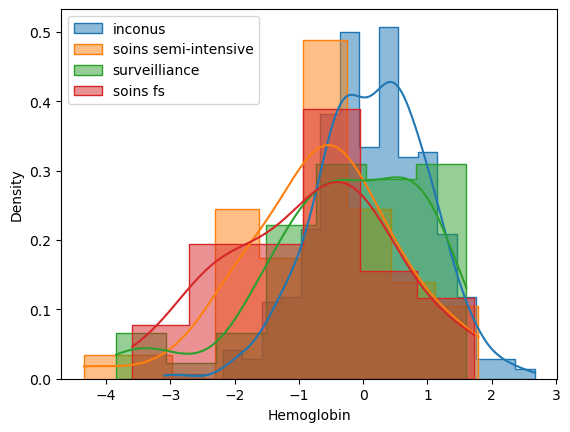

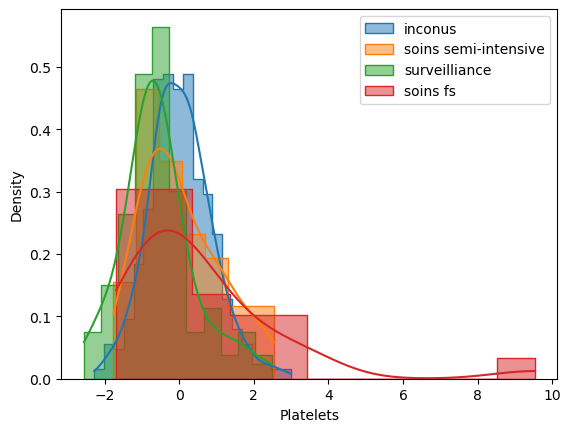

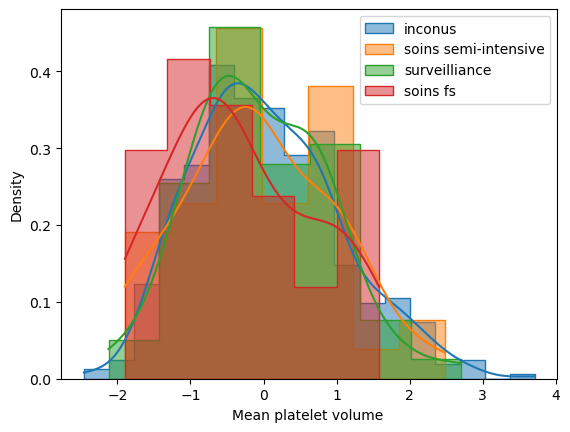

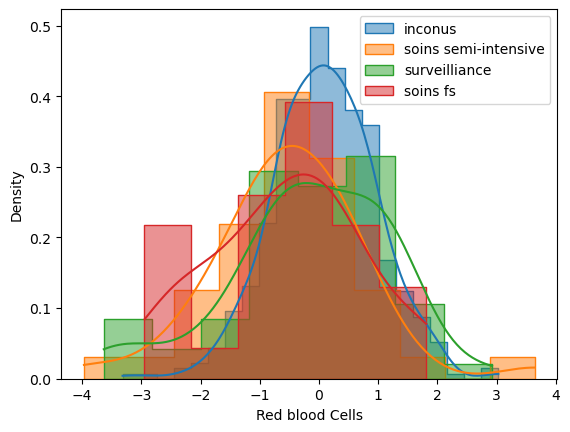

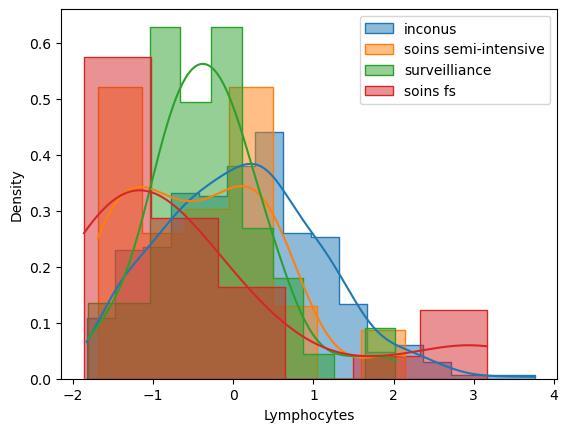

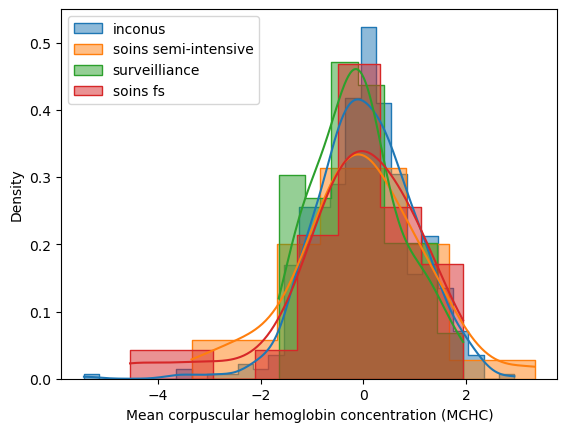

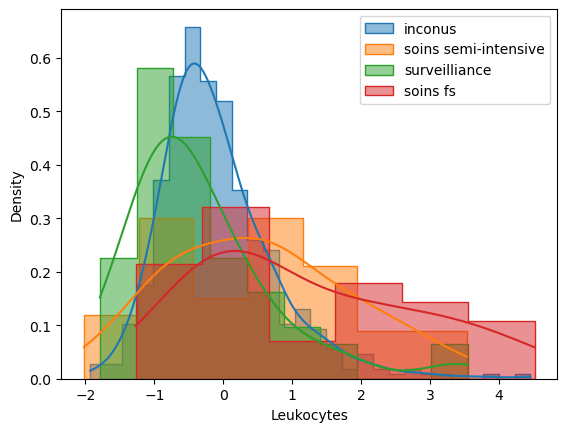

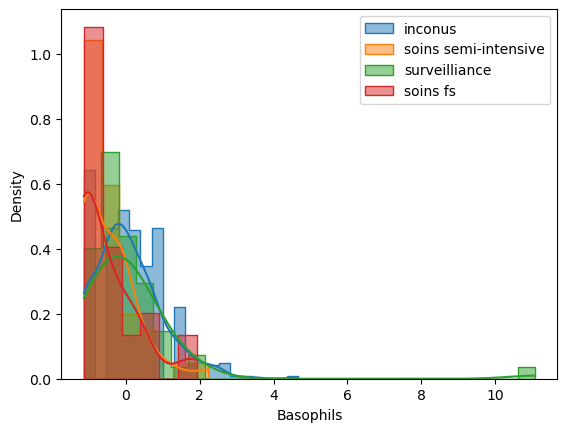

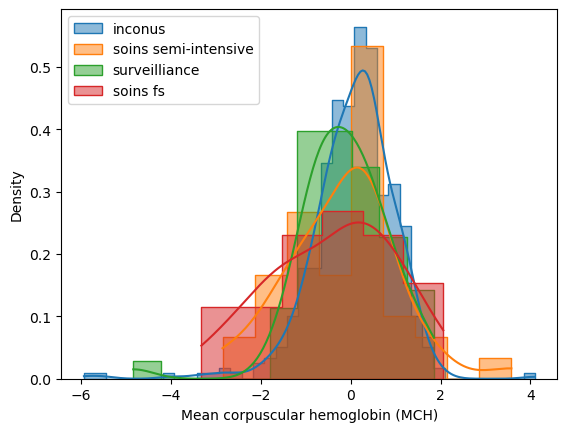

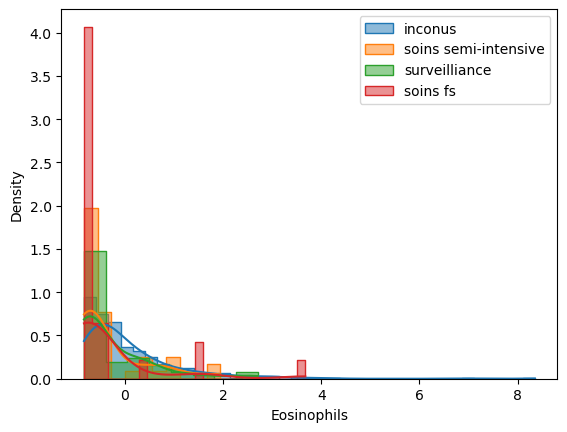

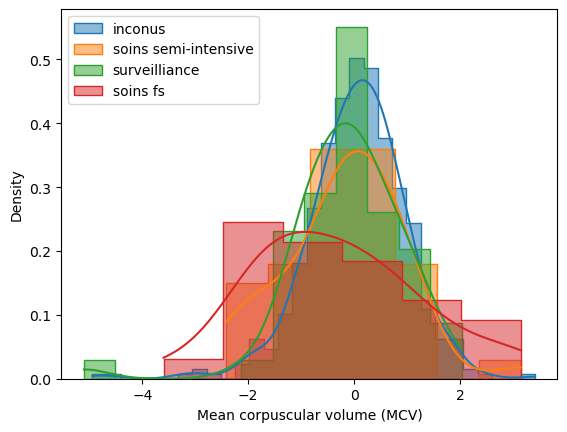

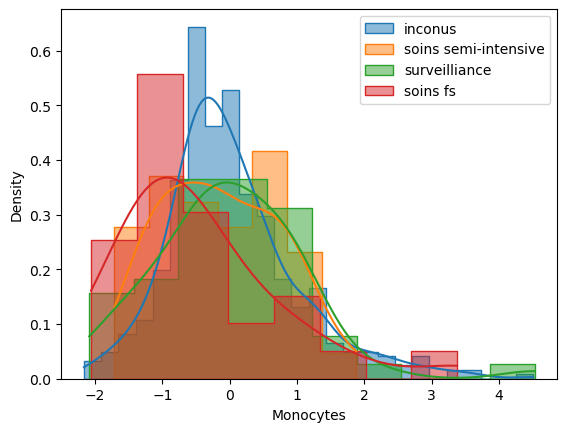

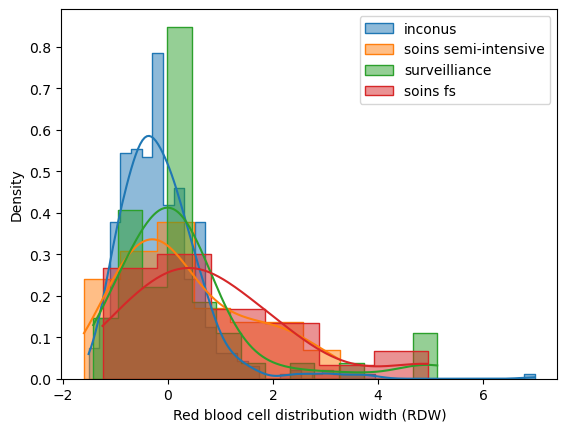

In [70]:
for col in blood_columns:
    if pd.api.types.is_numeric_dtype(positif_df[col]):
        plt.figure()
        for cat in df["statut"].unique():
            sns.histplot(df[df["statut"] == cat][col], kde=True, label=cat,stat="density", element="step", common_norm=False)
        plt.legend()

In [71]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [72]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

<Axes: >

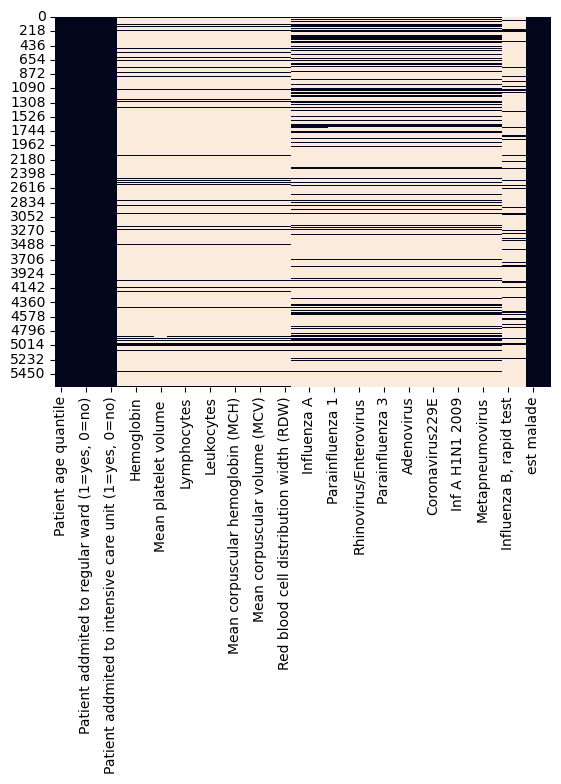

In [73]:
sns.heatmap(df.isna(), cbar=False)

In [74]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [75]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
Influenza B, rapid test                             820
Influenza A, rapid test                             820
dtype: int64

In [76]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [77]:
df1 = df[viral_columns[:-2]]
df1["covid"] = df["SARS-Cov-2 exam result"]
df1.dropna()["covid"].value_counts(normalize=True)

/tmp/ipykernel_46779/2888329630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["covid"] = df["SARS-Cov-2 exam result"]


covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [78]:
df2 = df[blood_columns [:-2]]
df2["covid"] = df["SARS-Cov-2 exam result"]
df2.dropna()["covid"].value_counts(normalize=True)

/tmp/ipykernel_46779/1748970141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["covid"] = df["SARS-Cov-2 exam result"]


covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

## T-Test

In [79]:
positif_df.shape

(558, 38)

In [80]:
negatif_df.shape

(5086, 38)

In [81]:
negatif_df.sample(positif_df.shape[0])

Patient age quantile SARS-Cov-2 exam result  \
4002                    18               negative   
2194                     9               negative   
1437                     7               negative   
3692                     9               negative   
3959                     5               negative   
...                    ...                    ...   
2443                     0               negative   
4789                     9               negative   
4994                     4               negative   
5517                    11               negative   
2609                     7               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
4002                                               0   
2194                                               0   
1437                                               0   
3692                                               0   
3959                                               0   
...                                              ...   
2443                                               0   
4789                                               0   
4994                                               0   
5517                                               0   
2609                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
4002                                                  0       
2194                                                  0       
1437                                                  0       
3692                                                  0       
3959                                                  0       
...                                                 ...       
2443                                                  0       
4789                                                  0       
4994                                                  0       
5517                                                  0       
2609                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
4002                                                  0             NaN   
2194                                                  0             NaN   
1437                                                  0             NaN   
3692                                                  0             NaN   
3959                                                  0             NaN   
...                                                 ...             ...   
2443                                                  0             NaN   
4789                                                  0             NaN   
4994                                                  0             NaN   
5517                                                  0             NaN   
2609                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
4002         NaN        NaN                    NaN              NaN   
2194         NaN        NaN                    NaN              NaN   
1437         NaN        NaN                    NaN              NaN   
3692         NaN        NaN                    NaN              NaN   
3959         NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
2443         NaN        NaN                    NaN              NaN   
4789         NaN        NaN                    NaN              NaN   
4994         NaN        NaN                    NaN              NaN   
5517         NaN        NaN                    NaN              NaN   
2609         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
4002          NaN                                               NaN   
2194          NaN                          

In [82]:
balanced_neg = negatif_df.sample(positif_df.shape[0])

In [83]:
def t_test(col):
    alpha = 0.2
    # On vérifie que la colonne est numérique avant de faire le test
    if pd.api.types.is_numeric_dtype(balanced_neg[col]) and pd.api.types.is_numeric_dtype(positif_df[col]):
        stat, p = ttest_ind(balanced_neg[col].dropna(), positif_df[col].dropna())
        if p < alpha:
            return "H0 rejeté"
        else:
            return 0

In [84]:
for col in blood_columns:
    print(f"{col :-<50}: {t_test(col)}")

Hematocrit----------------------------------------: 0
Hemoglobin----------------------------------------: 0
Platelets-----------------------------------------: H0 rejeté
Mean platelet volume -----------------------------: 0
Red blood Cells-----------------------------------: 0
Lymphocytes---------------------------------------: 0
Mean corpuscular hemoglobin concentration (MCHC)--: 0
Leukocytes----------------------------------------: H0 rejeté
Basophils-----------------------------------------: H0 rejeté
Mean corpuscular hemoglobin (MCH)-----------------: 0
Eosinophils---------------------------------------: H0 rejeté
Mean corpuscular volume (MCV)---------------------: 0
Monocytes-----------------------------------------: H0 rejeté
Red blood cell distribution width (RDW)-----------: 0
Influenza B, rapid test---------------------------: None
Influenza A, rapid test---------------------------: None


# Pre-traitement de donées

In [85]:
df = data.copy() 

In [86]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

## création des sous enssembles

In [102]:
missing_rate =df.isna().sum()/df.shape[0]
missing_rate

Patient age quantile                                0.000000
SARS-Cov-2 exam result                              0.000000
Hematocrit                                          0.893161
Hemoglobin                                          0.893161
Platelets                                           0.893338
Mean platelet volume                                0.893870
Red blood Cells                                     0.893338
Lymphocytes                                         0.893338
Mean corpuscular hemoglobin concentration (MCHC)    0.893338
Leukocytes                                          0.893338
Basophils                                           0.893338
Mean corpuscular hemoglobin (MCH)                   0.893338
Eosinophils                                         0.893338
Mean corpuscular volume (MCV)                       0.893338
Monocytes                                           0.893515
Red blood cell distribution width (RDW)             0.893338
Influenza B, rapid test 

In [103]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [104]:
key_columns = ["Patient age quantile", "SARS-Cov-2 exam result"]

In [105]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

## Netoyage encodage

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

In [108]:
train_set["SARS-Cov-2 exam result"].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [109]:
test_set["SARS-Cov-2 exam result"].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

In [110]:
for col in df.select_dtypes("object"):
    print(f"{col :-<50}: {df[col].unique()}")

SARS-Cov-2 exam result----------------------------: ['negative' 'positive']
Respiratory Syncytial Virus-----------------------: [nan 'not_detected' 'detected']
Influenza A---------------------------------------: [nan 'not_detected' 'detected']
Influenza B---------------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------: [nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------: [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------: [nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------: [nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------: [nan 'not_detected' 'detected']
Adenovirus----------------------------------------: [nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------: [nan 'not_detected' 'detected']


In [112]:
code = {"positive" : 1,
        "negative" : 0,
        "detected" : 1,
        "not_detected" : 0}

In [113]:
for col in df.select_dtypes("object"):
    df[col] = df[col].map(code)

In [114]:
df

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13                       0         NaN         NaN   
1                       17                       0    0.236515   -0.022340   
2                        8                       0         NaN         NaN   
3                        5                       0         NaN         NaN   
4                       15                       0         NaN         NaN   
...                    ...                     ...         ...         ...   
5639                     3                       1         NaN         NaN   
5640                    17                       0         NaN         NaN   
5641                     4                       0         NaN         NaN   
5642                    10                       0         NaN         NaN   
5643                    19                       1    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                                  NaN         NaN        NaN   
1                                            -0.950790   -0.094610  -0.223767   
2                                                  NaN         NaN        NaN   
3                                                  NaN         NaN        NaN   
4                                                  NaN         NaN        NaN   
...                                                ...         ...        ...   
5639                                               NaN         NaN        NaN   
5640                                               NaN         NaN        NaN   
5641                                               NaN         NaN        NaN   
5642                                               NaN         NaN        NaN   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                   NaN          NaN   
1                             -0.292269     1.482158   
2                                   NaN          NaN   
3                                   NaN          NaN   
4                                   NaN          NaN   
...                                 ...          ...   
5639                                NaN          NaN   
5640                                NaN          NaN   
5641                                NaN          NaN   
5642                                NaN          NaN   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                               NaN        NaN   
1                          0.166192   0.357547   
2                               NaN        NaN   
3                               NaN        NaN   
4                               NaN        NaN   
...                             ...        ...   
5639                            NaN        NaN   
5640                            NaN        NaN   
5641                            NaN        NaN   
5642                            NaN        NaN   
5643    

In [117]:
df.dtypes.value_counts()

float64    31
int64       2
Name: count, dtype: int64

In [153]:
def encodage(df):
    code = {"positive" : 1,
        "negative" : 0,
        "detected" : 1,
        "not_detected" : 0}
    for col in df.select_dtypes("object"):
        df[col] = df[col].map(code)
    return df

In [187]:
def feature_engenering(df):
    df["est malade"] = df[viral_columns].sum(axis=1) >=1
    df = df.drop(viral_columns, axis=1)
    return df

In [164]:
def imputation(df):
    return df.dropna(axis=0)

In [188]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engenering(df)
    df = imputation(df)
    
    x = df.drop("SARS-Cov-2 exam result", axis=1)
    y = df["SARS-Cov-2 exam result"]
    
    print(y.value_counts())
    
    return x,y

In [189]:
x_train,y_train = preprocessing(train_set)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [190]:
x_test,y_test = preprocessing(test_set)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


## Modelisation

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [233]:
model = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=10),RandomForestClassifier(random_state=0))

## Procédure d'Evaluation

In [234]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [235]:
def evaluation(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))


In [236]:
evaluation(model)

/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



In [237]:
def evaluation(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    N, train_score, val_score = learning_curve(model,x_train,y_train,scoring="f1", train_sizes=np.linspace(0.1,1.0,10),cv=4)
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label="train score")
    plt.plot(N,val_score.mean(axis=1),label="val score")
    plt.xlabel("train size")
    plt.legend()

/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constan

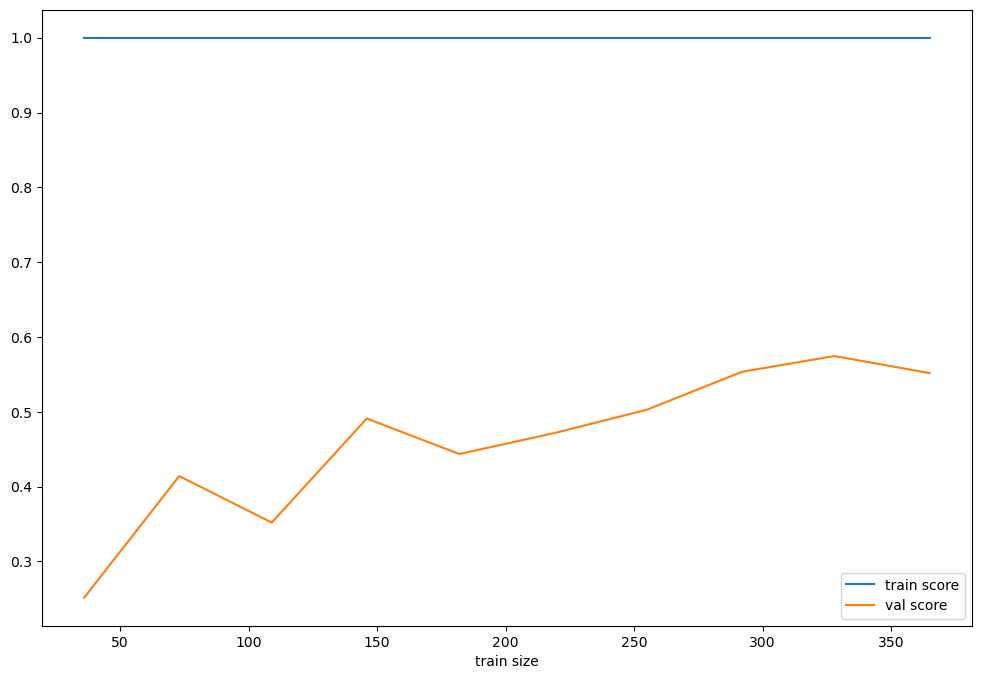

In [238]:
evaluation(model)

In [239]:
# On entraîne ton pipeline complet
model.fit(x_train, y_train)

# On récupère la sélection de features faite par SelectKBest
selected_features = x_train.columns[model.named_steps['selectkbest'].get_support()]

# On récupère le modèle RandomForest final
rf = model.named_steps['randomforestclassifier']

# On crée un DataFrame avec les importances
importances = pd.DataFrame(
    rf.feature_importances_,
    index=selected_features,
    columns=['Importance']
)

# On trace les barres
importances.sort_values(by='Importance', ascending=False).plot.bar(figsize=(12,8))
plt.title("Importance des variables sélectionnées")
plt.ylabel("Importance")
plt.show()


/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/gloire/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


IndexError: boolean index did not match indexed array along axis 0; size of axis is 16 but size of corresponding boolean axis is 153